In [5]:
pip install spark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 64 kB/s 
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58762 sha256=c8fc0ff271b5d2919986e0807f7d951ae8b2355a86a6f8e51c1fff86d852fae4
  Stored in directory: /root/.cache/pip/wheels/4e/0e/f1/164619f9920fb447d294afaae11a7715bd442ded7225953d72
Successfully built spark


In [6]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 46.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=13d94d04b64fe16fa32b36123c0f97ffd6fd09f27db600874974d88b3150a85d
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [7]:
import sys
import pyspark
import spark

from pyspark.sql import SparkSession
from pyspark.sql.functions import * #Importamos TODO 

In [ ]:
#from pyspark import SparkContext

#sc = SparkContext()

In [ ]:
import findspark
findspark.init("C:\spark")

Vamos a preparar la configuración que queremos utilizando Spark.  

1. Con el comando *setMaster("local")* les estamos indicando que vamos a ejecutar Spark localmente y en un sólo núcleo de CPU. 

2. Con el comando *setAppName("Histograma")* les estamos dando un nombre al Spark Application. 

3. Con el comando *sc = SparkContext(conf = conf)* iniciamos un contexto de Spark con la configuración indicada. Con esto crearemos las RDDs.

Tenemos varias formas de CREAR UN RDD:

1. Crear un RDD utilizando el comando *sc.parallelize()* sobre un *iterable* o un *collection* en el Spark Driver. Dichos elementos, tanto del iterable como de la colección, serán copiados para crear un RDD. Ejemplo: *sc.parallelize([1,2,3,4])*

2. Partiendo de un archivo utilizando el comando *sc.textFile()* para archivos *.txt* o *.csv*

3. Para otros formatos como el *JSON*, podemos utilizar *sc.read().json(archivo.json)*

In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Histograma")
sc = SparkContext(conf = conf) 


In [ ]:
sc

<SparkContext master=local appName=Histograma>

1. Con el comando *lines.map(lambda x : x.split()[2])* leemos cada línea, después aplicamos la función que convierte el string (de cada línea) en algo tipo lista, y de cada lista tomamos los elementos de la tercera columna.

Ejemplo: 1 2 3 en realidad lo lee como x = "1 2 3", luego x.split() = ["1","2","3"]. Finalmente x.split()[2] devuelve 3.


2. Con el comando *evaluaciones.countByValue()* contamos las veces que aparece cada evaluacion/nota. 

Ejemplo: 1 2 3 -> contaría cuantas veces aparece el 1, cuántas veces el 2, y así sucesivamente.



In [ ]:
#Con un conjunto de DATOS "CASERO", habría que utilizar el *parallelize()* para crear el RDD:

data = [('Project', 1),
('Gutenberg’s', 1),
('Alice’s', 1),
('Adventures', 1),
('in', 1),
('Wonderland', 1),
('Project', 1),
('Gutenberg’s', 1),
('Adventures', 1),
('in', 1),
('Wonderland', 1),
('Project', 1),
('Gutenberg’s', 1)]

rdd=sc.parallelize(data) #Creamos el RDD

rdd2=rdd.reduceByKey(lambda a,b: a+b)
for element in rdd2.collect():
    print(element)

('Project', 3)
('Gutenberg’s', 3)
('Alice’s', 1)
('Adventures', 2)
('in', 2)
('Wonderland', 2)


In [ ]:
#Otra forma de crear el RDD PARTIENDO DE UN ARCHIVO (.txt en nuestro caso):

In [ ]:
lines = sc.textFile("texto_pruebas_1.txt")
evaluaciones = lines.map(lambda x : x.split()[2])
resultados = evaluaciones.countByValue()

import collections #Ordenar resultados para hacer el histograma
resultadosOrdenados = collections.OrderedDict(sorted(resultados.items())) 
for clave, valor in resultadosOrdenados.items():
    print("%s %i" % (clave, valor))


1 11
2 2
3 3
4 2


In [ ]:
lines = sc.textFile("texto_pruebas_1.txt")
evaluaciones = lines.map(lambda x : x.split()[2])
resultados = evaluaciones.countByValue()

import collections #Ordenar resultados para hacer el histograma
resultadosOrdenados = collections.OrderedDict(sorted(resultados.items())) 
for clave, valor in resultadosOrdenados.items():
    print("%s %i" % (clave, valor))

1 11
2 2
3 3
4 2


**PARES (CLAVE, VALOR):**

Ejemplo: Queremos calcular el número promedio de amigos por edad usando Big Data de una red social.

Identificaremos como CLAVE -> Edad y VALOR -> nº de amigos (#Amigos).

El concepto del par (clave, valor) nos permite identificar de manera única, es decir, nos evita crear una lista para las edades y otra lista para el número de amigos; creando simplemente el par (Edad, #Amigos).

Uno de sus usos útiles es que podremos utilizar la función *reduceByKey*, que combinará todos los valores encontrados para una clave. Aunque lo haremos definiendo la función: 

    rdd.reduceByKey(lambda x y : x+y) #Esta función combina x = Edad e y
    
1. La función *reduceByKey()* combina todos los valores encontrados para una clave almacenándolo en forma de tupla *(clave, valor)*. De esta forma, en el ejercicio con el archivo "texto_pruebas_1.txt" tendríamos el par (2,1+2+3+2+1+...) para la clave Edad=2.

2. La función *groupByKey()* agrupa todos los valores encontrados para una misma clave.

3. La función *sortByKey()* clasifica los RDD por clave.

4. La función *keys()* crea un RDD con solo las claves.

5. La función *values()* crea un RDD con solo los valores.


···MAPEO EN PARES (clave, valor)···

**NOTA:** Si la transformación no afecta a las claves, es decir, si no vamos a modificar las claves utilizaremos *mapValues()* o *flatMapValues()* ya que ayuda a Spark a mantener la partición original del RDD, haciendo todo mucho más eficiente.





#EJERCICIO AMIGOS:



*   Mostrar elementos de un RDD.
*   *select()* y *collect()*.



**Ejercicio 1:** Queremos tratar una pequeña base de datos de una red social. Veamos cuál es el número promedio de amigos para usuarios de 33 años.

La BD tiene la siguiente estructura:

    userID  Nombre  Edad  numeroAmigos

**Mostrando (print) elementos en un RDD:**

Es común intentar mostrar los elementos de un RDD con comandos como *rdd.foreach(println)* o *rdd.map(println)*, esto mostraría los elementos del RDD. Ahora bien, hay que tener en cuenta si estamos en el **modo local** o en el **modo clúster**, pues si estamos en el modo clúster ahora la salida está siendo escrita en la salida de los *Spark executors*, NO EN LA SALIDA DEL *Spark Driver*, por tanto, ¡la salida no se mostrará!


1. El comando *collect()* es una *acción* que toma los elementos de un conjunto de datos (de todos los *nodos*) y los lleva al nodo del *Spark Driver*. Este comando se debe usar para conjuntos pequeños, después de realizar un filtrado con *filter()*, *group()*, etc. puesto que si se utiliza en conjuntos de datos muy grandes podría incurrir en un error *OutOfMemory* en el *Spark Driver* al cogerse todo el dataset en una sola máquina. Devuelve algo del tipo ITERABLE: *collect() : scala.Array[T]*

2. El comando *select()* es una *transformación* que devuelve un nuevo DataFrame y contiene las columnas seleccionadas. 

La diferencia entre *collect()* y *select()* es que el primero es una *acción* y el segundo una *transformación*; además, el primero devuelve el dataset completo en forma de array al *Spark Driver* mientras que el segundo solo muestra las columnas seleccionadas de un dataset.



In [ ]:
'''
Esta función se encargará del PREPROCESAMIENTO de los datos, es decir, 
aquí nos encargamos de decirle cómo es la estructura de nuestro dataset,
cómo queremos extraer y qué datos queremos 
extraer.

'''

def preprocesamientoDeDatos(line): #OJO: Ponemos "line" porque luego le vamos a pasar el archivo en 
                                   #la línea: rdd = lines.map(preprocesamientoDeDatos)
    campos = line.split() #Los camos están separados por un espacio ' '
    edad = int(campos[1]) #Tercera columna y son números enteros.
    numeroAmigos = int(campos[2]) #Cuarta columna y son números enteros.
    
    return (edad, numeroAmigos) #Devolver el par (clave, valor) 

lines = sc.textFile("texto_pruebas_1.txt")
rdd = lines.map(preprocesamientoDeDatos) #Aplicar a cada línea la función 
                                         #anterior. Ese será el RDD. (POCO EFICIENTE aplica un map a cada línea...)

totalesPorEdad = rdd.mapValues(lambda x : (x, 1)).reduceByKey(lambda y, z : (y[0]+z[0], y[1]+z[1]))
#También vale escribir: totalesPorEdad = rdd.mapValues(lambda x : (x, 1)).reduceByKey(lambda x, y : (x[0]+y[0], x[1]+y[1]))

'''
En el anterior *mapValues()* tenemos el par (33, 385) que eso es el *lambda x*,
a esto le aplicamos una tupla que contiene el par (nºamigos, valor = 1)
porque para obtener el promedio necesitamos contar todo el número total 
de amigos vistos para una Edad determinada y la cantidad de veces que 
esto ocurrió, por eso agregamos el 1. 

De esta forma: (33,385) -> (33,(385,1))


En el *reduceByKey()* sumamos todos los valores para cada clave única. 
En el ejemplo, se sumarían: (33,385) -> (33,(385,1)) y (33,2) -> (33,(2,1))
que daría como resultado (33,(387,2))

Es decir, sumamos todos los valores asociados a las claves 33 que va encontrando,
arrojando el par (33,(387,2)), donde el 2 es porque las ha encontrado 2 veces.
¡Esto es importante para hacer luego la media!

'''
mediaPorEdad = totalesPorEdad.mapValues(lambda x : x[0] / x[1])


In [ ]:
resultados = mediaPorEdad.collect()
resultados

[(2, 1.7777777777777777)]

In [ ]:
#FUNCIONAMIENTO DEL *reduceByKey()* PARA COMBINAR COSAS EN TUPLAS: 

tot = rdd.reduceByKey(lambda x, y : (x + y)) #Esto sumaría todos los números de amigos para la clave x=Edad
tot2 = tot.collect()
print(tot2)

[(2, 32)]


In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Amigos")
sc = SparkContext(conf = conf) 

In [ ]:
#Veamos CÓMO FUNCIONA EL *reduceByKey()* paso por paso:

In [ ]:
#FUNCIONAMIENTO DEL *reduceByKey()* PARA COMBINAR COSAS EN TUPLAS:
def preprocesamientoDeDatos2(line):
    campos = line.split(',') #Los camos están separados por un espacio ' '
    edad = int(campos[1]) #Tercera columna y son números enteros.
    numeroAmigos = int(campos[2]) #Cuarta columna y son números enteros.
    
    return (edad, numeroAmigos) #Devolver el par (clave, valor) 

lines2 = sc.textFile("amigos.csv")
rdd2 = lines2.map(preprocesamientoDeDatos2) #Aplicar a cada línea la función 
                                         #anterior. Ese será el RDD. (POCO EFICIENTE aplica un map a cada línea...)


In [ ]:
tot3 = rdd2.reduceByKey(lambda x, y : (x + y)) #Esto sumaría todos los números de amigos para la clave x=Edad
tot4 = tot3.collect()

print(tot4)

[(33, 385), (55, 2), (34, 221), (43, 21), (234, 318), (53, 555), (12, 66), (3221, 22), (32, 45), (1, 65)]


In [ ]:
tot_comb = rdd2.reduceByKey(lambda x, y : (x,y)) #OTRA FORMA DE COMBINAR
tot_comb_collect = tot_comb.collect()

print(tot_comb_collect)


[(33, 385), (55, 2), (34, 221), (43, 21), (234, 318), (53, 555), (12, 66), (3221, 22), (32, 45), (1, 65)]


In [ ]:
mapeo_unos_sobre_valores = rdd2.mapValues(lambda x : (x, 1))
mapeo_unos_sobre_valores_collect = mapeo_unos_sobre_valores.collect()
print(mapeo_unos_sobre_valores_collect)

[(33, (385, 1)), (55, (2, 1)), (34, (221, 1)), (43, (21, 1)), (234, (318, 1)), (53, (555, 1)), (12, (66, 1)), (3221, (22, 1)), (32, (45, 1)), (1, (65, 1))]


# CREACIÓN DEL ENTORNO SPARK UI A TRAVÉS DE GOOGLE COLAB:




In [ ]:
#QUEREMOS UTILIZAR EL SERVICIO SPARK UI PARA VISUALIZAR LOS SPARK JOB, CLÚSTERS Y EL DATA LINEAGE EN GOOGLE COLAB:

In [ ]:
#WEB ÚTIL:   https://stackoverflow.com/questions/55874956/how-to-open-spark-ui-when-working-on-google-colab

#!curl -s localhost:4040/api/tunnels
#!pip install -q pyspark
from pyspark.sql import SparkSession
sc = SparkSession.builder.config('spark.ui.port', '4050').getOrCreate()


In [ ]:
#Este método tampoco me funciona.... #Configuración del puerto local donde queremos el Spark UI

sc = SparkSession.builder.master("local").\
appName("Spark UI").\
config("spark.driver.bindAddress","localhost").\
config("spark.ui.port","4040").getOrCreate()

In [ ]:
sc

In [ ]:
#Instalación de *ngrok*:

!wget -qnc https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -n -q ngrok-stable-linux-amd64.zip


Cuando instalemos *ngrok* esto nos permitirá generar una URL (en la máquina local, en nuestra PC) que utilizaremos para acceder al Spark UI (el entorno de Spark para manejar los clúster, spark jobs, data lineage...). Esperad 5 segundos antes de iniciar.



In [ ]:
get_ipython().system_raw('./ngrok http 4040 &')
!sleep 5 #Esperar 5 sec
!curl -s http://localhost:4040/api/tunnels

# Acceder a datasets en Google Drive utilizando Google Colab:



In [4]:
#Para montar nuestro Drive en la máquina lanzamos el siguiente código:

from google.colab import drive
drive.mount('/content/drive') #Montamos la unidad

Mounted at /content/drive


Si quisiéramos acceder a un solo archivo, procederíamos a escribir algo tipo: 

    text = sc.textFile("/content/drive/dataset_eCommerce/2019-Dec.csv)

En cambio, normalmente un dataset descargado de un *.zip* contiene varios archivos *.json* o *.csv* o la extensión que sea. En esta situación, tenemos dos posibles casos:

1. Los dataset se encuentran en diferentes localizaciones y no queremos cambiar dichas localizaciones **(no recomendado)**, pues tendríamos que escribir a mano algo parecido a lo siguiente. Prestemos especial atención al slash invertido "**\**":

        text = sc.textFile("/content/drive/dataset_eCommerce/2019-Dec.csv,\    
                            /content/drive/dataset_eCommerce2/2020-Jan.csv,\ 
                            /content/drive/dataset_eCommerce3/2020-Feb.csv")

2. Los dataset se encuentran en una misma carpeta **(recomendado)**  y queremos acceder a todos los archivos sin necesidad de escribirlos uno a uno. Prestemos atención a la estrella "*.csv" del final.

        text = sc.textFile("/content/drive/dataset_eCommerce/*.csv)


El "*.csv" del final significa CARGAR TODOS LOS FICHEROS .csv.

NOTA: En el *caso 2* utilizamos la estrella "*" para tal propósito, pero es algo que se utiliza en Ubuntu también para el mismo propósito y en Spark, cuando creas el master con setMaster(local[ * ]), donde local[*] denota que accedemos a todos los núcleos de la CPU.

# Cargar datasets desde kaggle a Google Colab:

In [ ]:
#Cargar datasets en Google Colab, varias formas en: 
#https://towardsdatascience.com/7-ways-to-load-external-data-into-google-colab-7ba73e7d5fc7

# EJERCICIO TEMPERATURAS:


*   Filtrado de RDDs con la transformación *filter()*.
*   Mostrar RDDs: *take()* sobre RDDs y muestra de elementos de un RDD a través de un bucle *for* puesto que *collect()* devuelve un iterable.



In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Temperaturas")
sc = SparkContext(conf = conf) 
sc

**Ejercicio 2:** Queremos tratar una base de datos que almacena temperaturas diarias mínimas y máximas de cada día, de estaciones de diferentes países y durante el año 1800. Queremos tomar la MÍNIMA TEMPERATURA para cada estación en todo el año 1800.

La BD tiene la siguiente estructura:

    id_estacion  fecha  TMIN/TMAX  grados

**FILTRANDO RDDs:**

Queremos escoger sólo lo que nos interesa del dataset en el estudio de un problema. El comando *filter()* es una **TRANSFORMACIÓN**, pues nos devuelve un nuevo dataFrame (sin modificar el original) con el que trabajar. 


In [ ]:
#Preprocesamos los datos:

def preprocesamientoDeDatos_temperaturas(line):
   campos = line.split(',')
   ids = campos[0]
   min = campos[2]
   temp = campos[3]

   return (ids, min, temp)

"""
Creamos el RDD describiendo los parámetros de la función 
preprocesamientoDeDatos_temperaturas()
"""
lines_temp = sc.textFile('1800.csv')
rdd_temp = lines_temp.map(preprocesamientoDeDatos_temperaturas)

"""
Hagamos después un filtrado donde sólo queremos los campos donde figure "TMIN",
pues para nuestro estudio solo queremos averiguar las temperaturas mínimas para
cada estación
"""
minTemps_RDD = rdd_temp.filter(lambda x : "TMIN" in x[1]) #Queremos TMIN, que se encuentra en la columna 1
                                                          #después del preprocesamiento anterior: (ids, min, temp)                                                        

In [ ]:
"""
Tenemos el *minTemps_RDD* anterior de la siguiente forma (Ver sección "MOSTRANDO EL RDD de dos formas"):

    [('ITE00100554', 'TMIN', '-148'),
    ('EZE00100082', 'TMIN', '-135'),
    ('ITE00100554', 'TMIN', '-125'),
    ('EZE00100082', 'TMIN', '-130'),
    ('ITE00100554', 'TMIN', '-46'),
    ('EZE00100082', 'TMIN', '-73'),
    ('ITE00100554', 'TMIN', '-13'),
    ('EZE00100082', 'TMIN', '-74')]


De todos estos TMIN quiero la MÍNIMA temperatura, y para cada estación diferente.
Para ello hay que acceder a la primera columna (la 0) y tercera columna (la 2).
Esto lo podemos hacer con un simple *map*:
"""

est_map_RDD = minTemps_RDD.map(lambda x : (x[0], x[2]))
est_map_RDD


PythonRDD[12] at RDD at PythonRDD.scala:53

In [ ]:
est_map_RDD.take(8)

[('ITE00100554', '-148'),
 ('EZE00100082', '-135'),
 ('ITE00100554', '-125'),
 ('EZE00100082', '-130'),
 ('ITE00100554', '-46'),
 ('EZE00100082', '-73'),
 ('ITE00100554', '-13'),
 ('EZE00100082', '-74')]

In [ ]:
"""
Ahora tenemos que agrupar CADA *id_estacion* con su TEMPERATURA MÍNIMA de entre 
todas las del histórico. Como queremos "ligar" dicha temperatura mínima histórica
a cada id_esstación, podemos utilizar *reduceByKey()*.

El *reduceByKey()* de este código nos calcula la mínima temperatura histórica
para cada estación (es decir, PARA CADA CLAVE), agrupándolos en la dupla:
(id_estacion, grados)

OJO: El *min(x,y)* tomará DOS TEMPERTATURAS DE LA MISMA ESTACIÓN y verá 
cuál es la mínima temperatura de ellas
"""

est_map_RDD_min = est_map_RDD.reduceByKey(lambda x,y : min(x,y))
est_map_RDD_min

PythonRDD[30] at RDD at PythonRDD.scala:53

In [ ]:
for elem in est_map_RDD_min.collect():
  print(elem)

('ITE00100554', '-10')
('EZE00100082', '-102')


In [ ]:
#Otra forma de encontrar el mínimo sería la siguiente:
est_map_RDD.min(lambda x : x[1])

"""
El problema es que queremos agrupar la mínima temperatura para la estación
ITE00100554 Y TAMBIÉN la mínima temperatura para la otra estación EZE00100082. 

Podríamos hacer algo del estilo:

for x[0] in 'EZE00100082':
  est_map_RDD.min(lambda x : x[1])

Pero esto sería menos poco eficiente, es más eficiente utilizar el 
*reduceByKey()* (ver Sección: "Diferencia entre groupByKey() vs reduceByKey()")
"""

## MOSTRANDO EL RDD de dos formas:


In [ ]:
minTemps_RDD = rdd_temp.filter(lambda x : "TMIN" in x[1]) #Tomamos TMIN y lo colocamos en la columna 1
minTemps_RDD_collect = minTemps_RDD.collect()



Tenemos pues dos formas de mostrar el RDD:


*   Realizamos un *collect()* al *spark Driver* y mostramos cada elemento a través de un bucle *for* debido a que *collect()* crea un objeto iterable (lista, conjunto, diccionario...).
*   Realizamos un *take()* sobre el RDD creado de *minTemps*.



In [ ]:
for elem in minTemps_RDD_collect: #Nos mostrará len(minTemps_RDDc) = 730 filas de datos
  print(elem)              #El bucle se puede hacer porque el *collect()* crea un iterable. TIPO: scala.array[T]

In [ ]:
minTemps_RDD.take(8) #Toma n elementos de un RDD en forma de array y devuelve un array. Es decir,
                     #está definido como:   take(self: "RDD[T]", num: int) -> List[T]

[('ITE00100554', 'TMIN', '-148'),
 ('EZE00100082', 'TMIN', '-135'),
 ('ITE00100554', 'TMIN', '-125'),
 ('EZE00100082', 'TMIN', '-130'),
 ('ITE00100554', 'TMIN', '-46'),
 ('EZE00100082', 'TMIN', '-73'),
 ('ITE00100554', 'TMIN', '-13'),
 ('EZE00100082', 'TMIN', '-74')]

## DATAFRAMES EN SPARK. RDD vs DataFrame:

En PySpark, una **lista** significa una colleción de datos en el *Spark Driver*. Cuando creamos un **DataFrame**, esta colección es paralelizada, es decir, se crea un RDD de esa lista para empezar a trabajar en paralelo. 

Ahora bien, si escribimos *type(DataFrame)* este nos devuelve *pyspark.sql.dataframe.DataFrame*, es decir, que nos devuelve algo similar a una matriz, donde los objetos dentro de la lista son de tipo *Row(obj)*. Esto podría complicar un poco por cuestión de **ajustes de tipos**.
A pesar de todo, lo bueno es que *Row(obj)* es SUSCRIPTABLE (ver Sección: Trabajando con *datetime*), es decir, puedes acceder a la columna deseada de ese *Row(obj)* a través de índices *Row(objs)[i]*.

Principales diferencias entre RDD y DataFrame:


*   **Los DataFrame trabajan en una sola máquina, pero también trabajan en paralelo**. En cambio, **un RDD permite trabajar en varias máquinas y en paralelo**.

*   Los RDD son un tipo de estructura de datos especial de Apache Spark, mientras que los dataframes son una clase especial **de R**.





In [ ]:
#DATAFRAMES enlaces de ayuda:

#Crear dataFrame a partir de una lista: https://sparkbyexamples.com/pyspark/pyspark-create-dataframe-from-list/
#Pasar de RDD a dataFrame: https://sparkbyexamples.com/pyspark/convert-pyspark-rdd-to-dataframe/
"""
text.toDF()
df.printSchema()
df.show(truncate=False)
"""

### Diferencia entre SparkContext() y SparkSession():

Antes de continuar, debemos hablar de las diferencias entre *SparkContext()* y *SparkSession()* puesto que obtendremos un error si utilizamos un *SparkContext()* con *DataFrame*.  


*   *SparkContext()* o contexto de Spark es lo que nos permite trabajar con RDDs y comunicar estos con los clusters. 
*   *SparkSession()* es lo que nos permite trabajar con *DataFrame*, *DataSet* y RDDs; además, también nos permite conectar con otras funcionalidades de Spark como SQL, MLib (Machine Learning), entre otras.




Por tanto, **para trabajar con DataFrame, primero debemos iniciar una sesión de Spark o SparkSession()**. NO un *sparkContext()*.

### EJERCICIO E-COMMERCE:

Veamos esta sección a través de un dataset de: https://www.kaggle.com/datasets/mkechinov/ecommerce-events-history-in-cosmetics-shop

La estructura del dataset es la siguiente:

**File structure:**

    Property 	    Description

    event_time 	  Time when event happened at (in UTC).
    event_type 	  Only one kind of event: purchase.
    product_id 	  ID of a product
    category_id 	 Product's category ID
    category_code    Product's category taxonomy (code name) if it was possible to make it. 
                     Usually present for meaningful categories and skipped for different 
                     kinds of accessories.
    brand 	       Downcased string of brand name. Can be missed.
    price 	       Float price of a product. Present.
    user_id     	 Permanent user ID.
    user_session     Temporary user's session ID. Same for each user's session. 
                     Is changed every time user come back to online store from a long pause.


**Event types:**

    view - a user viewed a product
    cart - a user added a product to shopping cart
    remove_from_cart - a user removed a product from shopping cart
    purchase - a user purchased a product

NOTE (Multiple purchases per session): A session can have multiple purchase events. It's ok, because it's a single order.




El archivo es de tipo *.csv* y se vería de la siguiente manera:

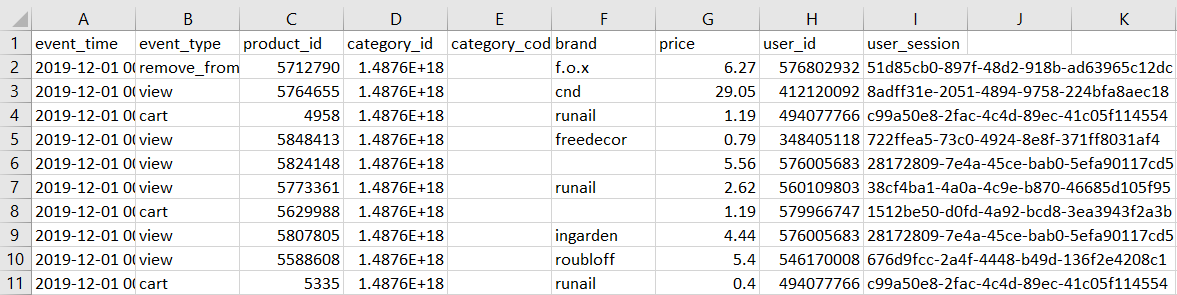

Dado que son muchos megas (en este caso, pero el dataset original son gigas), vamos a subirlos a google drive y vamos a aplicar lo estudiado en la sección "**Acceder a datasets en Google Drive utilizando Google Colab:**"

In [4]:
#Ruta de la carpeta en nuestro caso: /content/dataset_eCommerce/MyDrive/dataset_eCommerce
from google.colab import drive
drive.mount('/content/drive') #Montamos la unidad

Mounted at /content/drive


In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('eCommerce_2019Dec').getOrCreate()
spark

In [6]:
#Iniciamos un *SparkContext()* (dentro de la *SparkSession()*) también para los 
#casos en los que haya que pasar de list a RDD:

sc = spark.sparkContext


Ahora cargamos los archivos con el *SparkSession()* previamente cargado y creamos el DataFrame. En nuestro caso, la dirección es la siguiente y se trata de un solo dataset:

In [7]:
#¡MONTAR PREVIAMENTE EL DRIVE!

# Con *header = 'True'* le indicamos que la primera línea es la cabecera donde figura la descripción de cada columna.
# Con *inferSchema='True'* nos infiere la información de la estructura del dataset con sus respectivos tipos (string, int...)

df_eCommerce_2019Dec = spark.read.options(header='True', inferSchema='True').csv('drive/MyDrive/dataset_eCommerce/2019-Dec.csv')
df_eCommerce_2019Dec

DataFrame[event_time: timestamp, event_type: string, product_id: int, category_id: bigint, category_code: string, brand: string, price: double, user_id: int, user_session: string]

### COMANDOS PARA INTERACTUAR CON UN *DataFrame*:

1.   *count()*: Número de registro de un *DataFrame*
2.   *printSchema()*: Obtener el esquema de un *DataFrame*
  
3.   *select('column')*: Seleccionar columnas de un *DataFrame*
4.   *type()*: Obtener los tipos de algo
5.   *Row(obs)*: Cada fila de un *DataFrame*
6. *distinct()* vs *dropDuplicates(subset=None)*
7.  *withColumn('nombre_nuevo_col, df["column"]+1)*: Añadir una columna a un *DataFrame*, donde se suma +1 a cada registro de la nueva columna
8. *df.drop("column_1","column_2")*: Eliminar una o varias columna(s).
9. CREAR UN *DataFrame* A PARTIR DE UN RDD. Diferencia entre *toDF()* y *sparkSession.createDataFrame(RDD, schema=['col1','**col2**'])*
10. *df.sort(columna)*: ORDENAR de MENOR A MAYOR un *DataFrame*.
11. *df.sort(desc(columna))*: ORDENAR de MAYOR A MENOR un *DataFrame*.

**TRATAMIENTO DE VALORES *null*:**

    df.na.drop(how = 'any', thresh=None, subset=None)

1.   *df.na.drop()*: Eliminar todas las *Rows(objs)* que contengan algún valor *null*
2.   *df.na.drop()*: Eliminar todas


Parámetros: 

1.   *how()* tiene dos posiblidades:
> *'any'*: Elimina toda la fila *Rows(objs)* si esta contiene alguna columna *null*.

  > *'all'*: Elimina toda la fila *Rows(objs)* si esta contiene todos las columnas *null*.

2.   *thresh=*: Admite un número entero x y sirve para eliminar toda la fila *Rows(objs)* si esta contiene exactamente x valores *null*.

3.  *subset=*: Queremos eliminar valores *null* de una o varias columna(s) específicas. Ejemplo: *subset=['Age']*

---

**RELLENAR *valores missing*:**

    df.na.fill(value, subset=None)

1. *df.na.fill()*: Rellena las columnas con el valor *value* escrito, sustituyendo los valores *null* por *value*


Parámetros:

1. *value*: El valor por el que se va a sustituir *null*.
2. *subset=None*: Podemos indicar en qué columnas específicas queremos sustituir los valores *null* por *value*.

Ejemplo: *df.na.fill('Missing Values',['Experience','age'])* devolvería:

                                                  +---------+--------------+--------------+------+
                                                  |     Name|           age|    Experience|Salary|
                                                  +---------+--------------+--------------+------+
                                                  |  Shubham|            23|             2| 18000|
                                                  |   Mahesh|Missing Values|Missing Values| 40000|
                                                  |     null|            34|            10| 38000|
                                                  |     null|            36|Missing Values|  null|
                                                  |         |              |              |      |
                                                  +---------+--------------+--------------+------+



In [ ]:
#1. Obtener el número de registros del DataFrame:

df_eCommerce_2019Dec.count()

3533286

In [ ]:
#2. Obtener el esquema del DataFrame (columnas  :  tipo de dato):


df_eCommerce_2019Dec.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [ ]:
#3. Obtener los subcampos de dentro de "event_type" (como se señaló en la
   #estructura del dataset):

df_eCommerce_2019Dec.select("event_type").distinct().show()

+----------------+
|      event_type|
+----------------+
|        purchase|
|            view|
|            cart|
|remove_from_cart|
+----------------+





*   *distinct()*: Sirve para seleccionar los subcampos del *event_type* QUE SEAN DISTINTOS (no seleccionar repeticiones). Además, este comando NO TIENE ARGUMENTOS, solo se escribe *distinct()*.
*   *show()*: Sirve para mostrar el contenido del DataFrame en una tabla de formato filas y columnas. 

Si en el código anterior hubiésemos puesto simplemente: 

    df_eCommerce_2019Dec.select("event_type")

la salida habría sido:

    DataFrame[event_type: string]

### **distinct() vs dropDuplicates() en Apache Spark:**
Antes de empezar, supongamos que nuestra variable *df* contiene la siguiente información:

                                                                +---+------+---+
                                                                | id|  name|age|
                                                                +---+------+---+
                                                                |  1|Andrew| 25|
                                                                |  1|Andrew| 25|
                                                                |  1|Andrew| 26|
                                                                |  2| Maria| 30|
                                                                +---+------+---+


*   **distinct()**: Devuelve un nuevo *DataFrame* con FILAS distintas, es decir, aquellas *Row()* que no sean exactamente iguales. Además, este comando NO TIENE ARGUMENTOS, es decir, se escribe simplemente *distinct()*. 

    *Ejemplo 1*: Si aplicamos *df.distinct().show()*, resultaría:

                                                      +---+------+---+
                                                      | id|  name|age|
                                                      +---+------+---+
                                                      |  1|Andrew| 26|
                                                      |  2| Maria| 30|
                                                      |  1|Andrew| 25|
                                                      +---+------+---+

  *Ejemplo 2*: Si aplicamos lo anterior a un subconjunto del *DataFrame*, digamos, a *'id'* y *'name'*, tendríamos que escribir: *df.select(['id', 'name']).distinct().show()*, lo que resultaría:

                                                      +---+------+
                                                      | id|  name|
                                                      +---+------+
                                                      |  2| Maria|
                                                      |  1|Andrew|
                                                      +---+------+
QUE NO CONSERVA LA ESTRUCTURA DEL *DataFrame*, pues teníamos que hacer previamente un *select()* dado que *distinct()* no tiene argumentos. Si queremos conservar la estructura del *DataFrame* y mostrar TODAS LAS COLUMNAS, conviene usar *dropDuplicates(subset=None)*.



*   **dropDuplicates(subset=None)**: Devuelve un nuevo *DataFrame* con posibles duplicados eliminados. A diferencia del anterior, *dropDuplicates(subset=None)* SÍ QUE ADMITE ARGUMENTOS, pudiendo seleccionar las columnas de las que queramos eliminar los posibles duplicados. 

  Otra diferencia importante con respecto al comando anterior, es que *dropDuplicates(subset=None)* MANTIENE LA ESTRUCTURA DEL *DataFrame* original, cosa que, como vimos en el **ejemplo 2 anterior**, *duplicate()* NO hacía. 

  *Ejemplo 1*: Aplicamos simplemente *df.dropDuplicates().show()*, entonces esto devolvería lo mismo que el **ejemplo 1 anterior**, PERO CONSERVANDO LA ESTRUCTURA ORIGINAL DEL *DataFrame*:

                                                      +---+------+---+
                                                      | id|  name|age|
                                                      +---+------+---+
                                                      |  1|Andrew| 26|
                                                      |  2| Maria| 30|
                                                      |  1|Andrew| 25|
                                                      +---+------+---+

  *Ejemplo 2*: Si aplicamos esto sólo a las columnas *'id'* y *'name'*, es decir, si escribimos *df.dropDuplicates(['id', 'name']).show()* se obtiene:

                                                      +---+------+---+
                                                      | id|  name|age|
                                                      +---+------+---+
                                                      |  2| Maria| 30|
                                                      |  1|Andrew| 25|
                                                      +---+------+---+

  que a diferencia del *distinct()*, CONSERVA LA ESTRUCTURA ORIGINAL DEL *DataFrame*.

In [ ]:
#4. OJO: El tipo del *DataFrame*:

type(df_eCommerce_2019Dec)
df_eCommerce_2019Dec.take(2) #Es de tipo [Row(objs), Row(objs),...]. Importante para el map() y flatMap()

[Row(event_time=datetime.datetime(2019, 12, 1, 0, 0), event_type='remove_from_cart', product_id=5712790, category_id=1487580005268456287, category_code=None, brand='f.o.x', price=6.27, user_id=576802932, user_session='51d85cb0-897f-48d2-918b-ad63965c12dc'),
 Row(event_time=datetime.datetime(2019, 12, 1, 0, 0), event_type='view', product_id=5764655, category_id=1487580005411062629, category_code=None, brand='cnd', price=29.05, user_id=412120092, user_session='8adff31e-2051-4894-9758-224bfa8aec18')]

In [ ]:
#5. *Row(objs)* es suscriptable (ver Sección: "Trabajando con datetime"):
from pyspark.sql import Row  #OJO: NO OLVIDAR **import Row** para que se sepa que es 
                             #de pyspark.sql

blog_row = Row(6, "Reynold", "Xin", "https://tinyurl.6", 255568, "3/2/2015",
["twitter", "LinkedIn"])

blog_row[1]

'Reynold'

In [24]:
#6. AÑADIR una o varias columna(s) a un *DataFrame*:
#7. ELIMINAR una o varias columnas(s) a un *DataFrame*:

#(Ver **Solución 8** del ejercicio e-Commerce)


In [ ]:
#9. CREAR UN *DataFrame* PARTIENDO DE UN RDD:

gastado_eCommerce = rdd_df_eCommerce_2019Dec_pruebas_limpio_preproc.reduceByKey(lambda x,y : x+y) #RDD
df_medias_eCommerce = spark.createDataFrame(gastado_eCommerce, schema=['user_id','Media_por_ID'])
df_medias_eCommerce.show()

+---------+------------------+
|  user_id|      Media_por_ID|
+---------+------------------+
|576802932|              6.27|
|412120092|             29.05|
|494077766| 4.359999999999999|
|348405118|              0.79|
|473613801|2.2699999999999996|
|454314737|              1.73|
|582511748|              7.14|
|579939312|              24.6|
|582511116|              5.24|
|463201193|              3.97|
|567246505|              1.73|
|556587216|              2.81|
|568925679|              5.54|
|582841084|              1.73|
|533213163|35.239999999999995|
+---------+------------------+



In [56]:
gastado_eCommerce.toDF()

DataFrame[_1: bigint, _2: double]

In [18]:
#10. ORDENAR un *DataFrame* de MENOR A MAYOR:

df_medias_eCommerce.sort('Media_por_ID').show(3)


+---------+------------+
|  user_id|Media_por_ID|
+---------+------------+
|348405118|        0.79|
|454314737|        1.73|
|582841084|        1.73|
+---------+------------+
only showing top 3 rows



In [19]:
#11. ORDENAR un *DataFrame* de MAYOR A MENOR:

df_medias_eCommerce.sort(desc('Media_por_ID')).show(3)

+---------+------------------+
|  user_id|      Media_por_ID|
+---------+------------------+
|533213163|35.239999999999995|
|412120092|             29.05|
|579939312|              24.6|
+---------+------------------+
only showing top 3 rows



### Diferencia entre *toDF()* y spark.createDataFrame()*

Ambos llevan a cabo la misma tarea, pero *toDF()* no te permite personalizar los nombres de las columnas, por defecto asigna unos nombres "_1",...,"_n".
En cambio, con *createDataFrame()* puedes personalizar más tu *DataFrame*. 

    sparkSession.createDataFrame(RDD/iterable(lista,set...), schema=['col1','col2'])

OJO: Para *createDataFrame()* tenemos que iniciar previamente una *sparkSession* pues es un comando de *SparkSQL*. 

Ver el **apartado 9** de "COMANDOS PARA INTERACTUAR CON UN *DataFrame*" para tener una visualización de la diferencia.

**POSIBLES PREGUNTAS PARA EXTRAER INFORMACIÓN A FAVOR DE MAXIMIZAR BENEFICIOS:**
1. Encontrar el artículo que se vende más.
2. Encontrar el artículo que se vende más en determinadas estaciones del año. Seleccionar del dataset de *2019Dec.csv* **qué producto se vende más en cada semana del mes de Diciembre**.

3. Seleccionar los *product_id* que son añadidos al carrito.

4. Seleccionar las *user_session* donde el 'product_id=4958' es añadido al carrito.

5. Seleccionar los *user_session* con productos DIFERENTES AL product_id=4958 que han sido añadidos al carrito.

6. Seleccionar de diferentes productos DIFERENTES AL product_id=4958, que han sido añadidos al carrito TOMANDO MIS SESIONES DE USUARIO ALMACENADAS EN 'sesiones_usuario' de la pregunta 5. (cross selling, como hace Amazon). 

7. Imaginemos que agrupamos en pares *(clave, valor)*, donde tendremos en ese par *(product_id, numero_veces_comprado_ese_produc_id)*. El objetivo es, en lugar de mostrar el par anterior, mostrar los NOMBRES (brands) de los artículos junto con las veces que se han vendido estos, es decir, (marca, numero_de_ventas_de_esa_marca).
8. AÑADIR una nueva columna al *DataFrame* *df_eCommerce_2019Dec_pruebas* donde se realiza una suma de 1€ al precio de todos los productos debido a la inflación. ELIMINAR las columnas sobranes "_c9",...,"_c13" de dicho *DataFrame* previamente.

In [ ]:
#Solución a 1 (Selección del producto que más se compran):

#Seleccionamos solo la columna de marcas 'brand' y tomamos solo los 'brand' comprados:
marcas = df_eCommerce_2019Dec.select(['brand']).filter("event_type = 'purchase'")



In [ ]:
type(marcas)

pyspark.sql.dataframe.DataFrame

In [ ]:
marcasRDD = marcas.rdd #Pasamos a RDD para aplicar a este map -> (brand, 1) y contar las ocurrencias con reduceByKey()
marcasRDD

MapPartitionsRDD[15] at javaToPython at NativeMethodAccessorImpl.java:0

In [ ]:
marcasRDD.take(2)

[Row(brand='runail'), Row(brand='runail')]

In [ ]:
"""
Ahora bien, fijémonos en el tipo de *marcasRDD* que es "[Row(brand='runail'), Row(brand='runail')]".
Con lo cual este RDD lo está bien más como una lista de filas y NO como una lista 
de strings.

Esto es porque HEMOS SELECCIONADO DIRECTAMENTE DEL *DataFrame*, y estos, como ya
vimos en la definición de *DataFrame*, devuelven tipos *Row(obj)*, una primera 
idea es ACCEDER DIRECTAMENTE A LOS ELEMENTOS POR LO CUAL HABRÍA QUE APLICAR UN
*flatMap()*:
"""

def flatMapeo_marcasRDD(col):
  if (col["event_type"] == "purchase"): 
    return [(col["brand"], 1)]
  return []


In [ ]:
tuplas_marcasRDD = df_eCommerce_2019Dec.rdd.flatMap(flatMapeo_marcasRDD)

tuplas_marcasRDD.take(3)

[('runail', 1), ('runail', 1), ('runail', 1)]

In [ ]:
tuplas_marcasRDDmap = df_eCommerce_2019Dec.rdd.map(flatMapeo_marcasRDD)

tuplas_marcasRDDmap.take(3) #SALE LISTA DE LISTAS VACÍAS. Seguir leyendo

[[], [], []]

¿Por qué devuelve todo el tiempo lista de listas vacías? Porque el tipo de *df_eCommerce_2019Dec.rdd*, a pesar de ser *pyspark.rdd.RDD*, 
si tomamos varios elementos miremos lo que ocurre:


In [ ]:
df_eCommerce_2019Dec.rdd

MapPartitionsRDD[21] at javaToPython at NativeMethodAccessorImpl.java:0

In [ ]:
type(df_eCommerce_2019Dec.rdd)

pyspark.rdd.RDD

In [ ]:
df_eCommerce_2019Dec.rdd.take(2) #Siguen siendo [Row(),Row(),...]

[Row(event_time=datetime.datetime(2019, 12, 1, 0, 0), event_type='remove_from_cart', product_id=5712790, category_id=1487580005268456287, category_code=None, brand='f.o.x', price=6.27, user_id=576802932, user_session='51d85cb0-897f-48d2-918b-ad63965c12dc'),
 Row(event_time=datetime.datetime(2019, 12, 1, 0, 0), event_type='view', product_id=5764655, category_id=1487580005411062629, category_code=None, brand='cnd', price=29.05, user_id=412120092, user_session='8adff31e-2051-4894-9758-224bfa8aec18')]

In [ ]:
"""
Si queremos utilizar la función *map()* (NO *flatMap()*)
hay que programarlo de forma distinta, pues *map()*
es una aplicación 1 A 1 Y *map()* ¡VA A TOMAR TODA LA 
FILA *Row(objs)*! Por eso anteriormente devolvía [[],[],[]], 
puesto que el campo columna *col["event_type"] == 'purchase'*
ni siquiera existe para él, ¡ya que *map()* lee *Row(objs)*!
"""

def mapeo_marcasRDD_OK_1(Row):
  if (Row(["event_type"] == "purchase")): #IMPORTANTE: Decimos que DENTRO de cada registro *Row(objs)* busque los "purchase"
    return [(Row["brand"], 1)]
  return []

In [ ]:
def mapeo_marcasRDD_OK_2(Row):
  if (Row(["event_type"] == "purchase")): #IMPORTANTE: Decimos que DENTRO de cada registro *Row(objs)* busque los "purchase"
    return (Row["brand"], 1)
  return []

In [ ]:
tuplas_marcasRDDmap_OKKKK = df_eCommerce_2019Dec.rdd.map(mapeo_marcasRDD_OK_2)

tuplas_marcasRDDmap_OKKKK.take(3) 

[('f.o.x', 1), ('cnd', 1), ('runail', 1)]

In [ ]:
tuplas_marcasRDDmap_OK = df_eCommerce_2019Dec.rdd.map(mapeo_marcasRDD_OK_1)

tuplas_marcasRDDmap_OK.take(3) 

[[('f.o.x', 1)], [('cnd', 1)], [('runail', 1)]]

In [ ]:
#NOTA: El tipo del resultado anterior es un tanto absurdo si luego queremos aplicar 
#funciones para tuplas (clave, valor), luego convendría APLANAR EL RESULTADO 
#ANTERIOR. Por tanto, mejor usar en este caso *flatMap()* desde el principio.



### Polémica *map()* vs *flatMap()*:

(Para más información sobre las múltiples diferencias entre estos dos comandos véase la sección **"NOTA: map() vs flatMap"**).

En las líneas anteriores se nos presentaba otro uso notable diferenciador entre *map()* y *flatMap()*.

Por un lado, teníamos la función **para hacer luego un flatMap()**:

      def flatMapeo_marcasRDD(col):
        if (col["event_type"] == "purchase"): 
          return [(col["brand"], 1)]
        return []

En dicha función podemos escribir simplemente *col["event_type"] == "purchase"* porque *flatMap()* aplana el RDD quitando el tipo *Row(obj)*. 
Por supuesto, también podemos utlizar la función *mapeo_marcasRDD_OK(Row)* puesto que *flatMap()* no es tan "rígido" como el *map()* simple, ya que *flatMap()* no solo se aplicará a cada registro *Row(objs)* sino que **accederá SOLO al campo indicado** y "aplanará" el resultado devolviendo una lista de tuplas y no una lista de *Row(objs)*.
Esta es la consecuencia de que *flatMap()* devuelva de **0 a N** outputs, puesto que accede a cada campo interno dentro de cada *Row(objs)*, pudiendo darse el caso de que en ese *Row(objs)* haya casos repetidos, y estos sean devueltos en el output.

---

En cambio, si utilizamos la función *map()*, como aquí la correspondencia se efectúa **1 a 1**, hay más rigidez, por tanto, para las operaciones **tomará toda la fila Row(objs) y NO accederá al campo deseado (a no ser que se lo especifiquemos)** como sí lo hace *flatMap()*, **por lo que para realizar la operación en algún campo (columna) de dentro de *Row(objs)* habría que especificar que queremos DENTRO de un campo determinado en Row(objs)**. En nuestro caso, la función a utilizar sería: 

    def mapeo_marcasRDD_OK(Row):
      if (Row(["event_type"] == "purchase")):
        return [(Row["brand"], 1)]
      return []

### Dataset para pruebas pequeñas eCommerce

In [7]:
#IMPORTANTE: DEJAMOS ESTE DATASET PARA REALIZAR PRUEBAS PEQUEÑAS DE NUESTRAS FUNCIONES Y LUEGO 
#APLICARLAS A BigData:

df_eCommerce_2019Dec_pruebas = spark.read.options(header='True', inferSchema='True').csv('drive/MyDrive/dataset_eCommerce/2019-Dec-pruebas.csv')
df_eCommerce_2019Dec_pruebas

DataFrame[event_time: timestamp, event_type: string, product_id: int, category_id: double, category_code: string, brand: string, price: double, user_id: int, user_session: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string]

### Pasar de string 'str' a 'datetime': (PENDIENTES ALGUNOS PUNTOS)





Si escribimos en un Excel a mano, Excel puede entender que es tipo string 'str', por eso hay dos formas de pasar de 'str' a 'datetime':

1. Escribir en Excel DATEVALUE(celda) para las fechas o DATETIME(celda) para las horas. Esto se pasará al *datetime* de Excel. El problema es que si el Excel contiene muchas líneas... pues lo no es lo recomendado.

2. Utilizar *to_date()* para cambiar a tipo datetime. **Esto es un comando de Spark SQL**, luego habrá que convertirlo a tipo *pyspark.sql.dataframe.DataFrame*.   

        SINTAXIS: to_date(dateColumn:Column,format:String) : Column

3. **(RECOMENDADO)**. Construir nuestra pequeña función para convertir de *str* a *datetime.datetime*. Esto dependerá de como se presente la fecha en cuestión, pero las ideas son similares. *datetime = date + time*. 

  **CASO 1**: La fecha es del tipo siguiente:
        strdate = '2019-12-01'  #SIN ESTO: 00:00:00 UTC

   En este caso, la función *parse_date(date)* sería:
        def parse_date(date):
          return datetime.strptime(date, '%Y-%m-%d').date()

  **CASO 2**: La fecha es del tipo siguiente:
        strdate = '2019-12-01 00:00:00 UTC'

   En este caso, la función *parse_date(date)* sería:
        def parse_date(date):
          return datetime.strptime(date, '%Y-%m-%d %H:%M:%S').date()

**NOTA**: Las funciones anteriores funcionan bien si no importamos previamente la librería *datetime*, si hacemos *import datetime* entonces habría que escribir 

      return datetime.datetime.strptime(args)

In [ ]:
#¡¡CONVERTIR LA COLUMNA "event_time" A "datetime"!! 
from datetime import datetime
import pandas as pd


#df_eCommerce_2019Dec_pruebas["event_time"] = pd.to_datetime(df_eCommerce_2019Dec_pruebas["event_time"], format="%m/%d/%Y, %H:%M:%S")


df_eCommerce_2019Dec_pruebas["event_time"] = df_eCommerce_2019Dec_pruebas["event_time"].apply(lambda _: datetime.strptime(_,"%Y, %d, %m, %H, %M, %S")) #.to_date("event_time")

In [ ]:
df_eCommerce_2019Dec_pruebas.select(["event_time"]).rdd.take(1)

[Row(event_time='2019-12-01 00:00:00 UTC')]

In [ ]:
"""
Syntax: to_date(column,format)
Example: to_date(col("string_column"),"MM-dd-yyyy") 

df.select(col("input"),to_date(col("input"),"MM-dd-yyyy").alias("date")).show()
"""
#https://sparkbyexamples.com/pyspark/pyspark-to_date-convert-string-to-date-format/#:~:text=PySpark%20SQL%20function%20provides%20to_date,to%20date%20(%20DateType%20)%20column.

from pyspark.sql.functions import *
from datetime import datetime

df_eCommerce_2019Dec_pruebas.select(df_eCommerce_2019Dec_pruebas["event_time"],to_date(df_eCommerce_2019Dec_pruebas["event_time"], "yyyy-MM-dd HH-MM-SS UTC"))


DataFrame[event_time: string, to_date(event_time, yyyy-MM-dd HH-MM-SS UTC): date]



---
**FIN DE LA SECCIÓN sobre conversión de 'str' a 'datetime'**


---



Retomando el *problema 1*, tenemos de la variable *tuplas_marcasRDD* una salida de este tipo:

    [('runail', 1), ('runail', 1), ('runail', 1)]

A la cual ahora podemos aplicar *reduceByKey()* para combinar los resultados

In [ ]:
conteo_tuplas_marcasRDD = tuplas_marcasRDD.reduceByKey(lambda x,y : x+y)
conteo_tuplas_marcasRDD.take(2)

[(None, 91695), ('jessnail', 1823)]

In [ ]:
#Ahora hay que tomar el máximo número de ventas del conteo anterior:

maximo_ventas = conteo_tuplas_marcasRDD.max(lambda x : x[1])
print(maximo_ventas)

(None, 91695)


Luego lo más vendido son productos de marca blanca.

Comprobamos que el output del código anterior es cierto con el **dataset para pruebas pequeñas**:

In [ ]:
flatMapeo_2019Dec_pruebas = df_eCommerce_2019Dec_pruebas.rdd.flatMap(flatMapeo_marcasRDD)
flatMapeo_2019Dec_pruebas.take(3)

[('runail', 1), (None, 1), ('runail', 1)]

In [ ]:
conteo_2019Dec_pruebas = flatMapeo_2019Dec_pruebas.reduceByKey(lambda x,y : x+y)
conteo_2019Dec_pruebas.take(4)

[('runail', 4), (None, 1), ('ingarden', 2), ('metzger', 1)]

In [ ]:
pruebas_maximo_ventas = conteo_2019Dec_pruebas.max(lambda x : x[1])
print(pruebas_maximo_ventas)

('runail', 4)


In [ ]:
#Solución a 2 (Encontrar qué producto se vende más en cada semana del mes de Diciembre.)

"""
Comentarios previos para dataset VERANO: 
1. ¿Cuándo empieza el verano en América Latina (incluye México)? Del 22 de diciembre al 21 de marzo.
2. Europa y EEUU es del 21 de junio al 20 de septiembre (temporada alta).

Tomaríamos como referencia temporada alta (verano) de EEUU y Europa, puesto que nuestro
dataset no distingue entre la nacionalidad de los clientes.
"""

In [ ]:
#Seleccionamos las columnas "event_time" y "brand" solo aquellas marcas que han sido comprados:

df_eCommerce_2019Dec_marcas_time_comprados = df_eCommerce_2019Dec.select(["event_time", "brand"]).filter("event_type='purchase'")
df_eCommerce_2019Dec_marcas_time_comprados

DataFrame[event_time: timestamp, brand: string]

In [ ]:
#El tipo es esperado, puesto que es *Row(objs)* y el tiempo es de un tipo especial *datetime* YYYY-MM-DD HH:MM:SS:
df_eCommerce_2019Dec_marcas_time_comprados.take(2)

[Row(event_time=datetime.datetime(2019, 12, 1, 0, 17, 50), brand='runail'),
 Row(event_time=datetime.datetime(2019, 12, 1, 0, 17, 50), brand='runail')]

In [ ]:
df_eCommerce_2019Dec.select(["event_time"]).tail(3) #Diciembre sabemos que tiene 31 días.

[Row(event_time=datetime.datetime(2019, 12, 31, 23, 59, 51)),
 Row(event_time=datetime.datetime(2019, 12, 31, 23, 59, 52)),
 Row(event_time=datetime.datetime(2019, 12, 31, 23, 59, 57))]

In [ ]:
df_eCommerce_2019Dec["event_time"].day == 12

Column<'(event_time[day] = 12)'>

In [ ]:
"""
def flatMapeo_solucion2(col):

  if (col["event_time"].day in range(2,9)) & (col["event_time"].month == 12): #Seleccionar del día 2 al 8
    print("Días 2 al 8 (incluidos):")
    return [(col["brand"], 1)]

  if (col["event_time"].day in range(9,16)) & (col["event_time"].month == 12):
    print("Días 9 al 15 (incluidos):")
    return [(col["brand"], 1)]

  if (col["event_time"].day in range(16,23)) & (col["event_time"].month == 12):
    print("Días 16 al 22 (incluidos):")
    return [(col["brand"], 1)]

  if (col["event_time"].day in range(23,30)) & (col["event_time"].month == 12):
    print("Días 23 al 29 (incluidos):")
    return [(col["brand"], 1)]

  return []

Lo anterior NO se puede hacer, pues se utilizan varios "return" esperando 
varias salidas, y con return solo puedes esperar UNA salida por función
"""

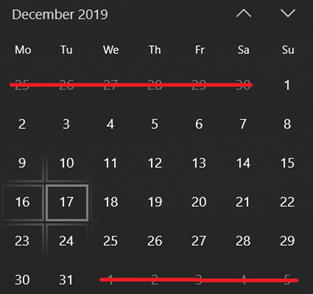

In [ ]:
df_eCommerce_2019Dec_marcas_time_comprados_flatMap = df_eCommerce_2019Dec_marcas_time_comprados.rdd.flatMap(flatMapeo_solucion2)

In [ ]:
df_eCommerce_2019Dec_marcas_time_comprados_flatMap.collect()



---


**A PARTIR DE AQUÍ TRABAJAMOS CON EL FICHERO .csv DE PRUEBAS PARA TESTEAR LOS RESULTADOS. LO QUE ESTÁ ENCIMA DE ESTA LÍNEA DE CÓDIGO ES CON EL DATASET ORIGINAL**

---



In [ ]:
#:::::::::::::::::::::::::::CON EL ARCHIVO DE PRUEBAS::::::::::::::::::::

"""
1. Seleccionar un rango dia:mes a dia:mes con el dataset DE PRUEBA.
2. Seleccionar productos más vendidos del dataset de prueba.
"""

In [ ]:
#Dado que el tiempo es de un tipo especial *datetime*, utilizaremos un *flatMap()* para acceder sólo 
#a la columna [2] DE DENTRO DE *Row(objs)*, en el caso anterior, donde están los 1, que 
#corresponden a los meses       ¡¡¡¡¡(véase sección "Trabajando con datetime")!!!!!:

from datetime import datetime #Estructura del datetime en el eCommerce: YYYY-MM-DD HH:MM:SS

def pruebas_flatMapeo_fechas_meses(col_dia_mes):
  if ((col_dia_mes["event_time"].day >= 5) & (col_dia_mes["event_time"].day < 9) & \
      (col_dia_mes["event_time"].month == 12)):  #véase sección "Trabajando con datetime"
    return [(col_dia_mes["brand"], 1)]
  return []


def parse_date(date):
  return datetime.strptime(date, '%Y-%m-%d').date()


In [ ]:
rdd_2019dec_pruebas = df_eCommerce_2019Dec_pruebas.rdd
rdd_2019dec_pruebas.count()

25

In [ ]:
df_eCommerce_2019Dec_pruebas.take(2)

[Row(event_time=datetime.datetime(2019, 12, 1, 0, 0), event_type='remove_from_cart', product_id=5712790, category_id=1.48758e+18, category_code=None, brand='f.o.x', price=6.27, user_id=576802932, user_session='51d85cb0-897f-48d2-918b-ad63965c12dc', _c9=None, _c10=None, _c11=None, _c12=None, _c13=None),
 Row(event_time=datetime.datetime(2019, 12, 1, 0, 0), event_type='view', product_id=5764655, category_id=1.48758e+18, category_code=None, brand='cnd', price=29.05, user_id=412120092, user_session='8adff31e-2051-4894-9758-224bfa8aec18', _c9=None, _c10=None, _c11=None, _c12=None, _c13=None)]

In [ ]:
rdd_2019dec_pruebas.take(2)

[Row(event_time=datetime.datetime(2019, 12, 1, 0, 0), event_type='remove_from_cart', product_id=5712790, category_id=1.48758e+18, category_code=None, brand='f.o.x', price=6.27, user_id=576802932, user_session='51d85cb0-897f-48d2-918b-ad63965c12dc', _c9=None, _c10=None, _c11=None, _c12=None, _c13=None),
 Row(event_time=datetime.datetime(2019, 12, 1, 0, 0), event_type='view', product_id=5764655, category_id=1.48758e+18, category_code=None, brand='cnd', price=29.05, user_id=412120092, user_session='8adff31e-2051-4894-9758-224bfa8aec18', _c9=None, _c10=None, _c11=None, _c12=None, _c13=None)]

In [ ]:
a = rdd_2019dec_pruebas.flatMap(pruebas_flatMapeo_fechas_meses)

In [ ]:
type(rdd_2019dec_pruebas)

pyspark.rdd.RDD

In [ ]:
print(df_eCommerce_2019Dec_pruebas)

DataFrame[event_time: timestamp, event_type: string, product_id: int, category_id: double, category_code: string, brand: string, price: double, user_id: int, user_session: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string]


In [ ]:
a.count()

9

In [ ]:
a.take(9) #Comprobar contando las filas del fichero de Excel "2019-Dec-pruebas.csv"

[('masura', 1),
 ('runail', 1),
 ('irisk', 1),
 ('grattol', 1),
 ('bluesky', 1),
 ('masura', 1),
 ('kapous', 1),
 ('masura', 1),
 ('masura', 1)]

In [ ]:
agrupados_a = a.reduceByKey(lambda x,y : x + y)
agrupados_a.take(agrupados_a.count())

[('masura', 4),
 ('runail', 1),
 ('irisk', 1),
 ('grattol', 1),
 ('bluesky', 1),
 ('kapous', 1)]

Luego en Diciembre, entre los días 5 y 9 (este último sin incluir), el producto más vendido fue *masura*.



---



In [ ]:
#Sobre CALENDAR EN PYTHON:
import calendar
   
yy = 2019
mm = 12
   
# display the calendar
print(calendar.month(yy, mm))

   December 2019
Mo Tu We Th Fr Sa Su
                   1
 2  3  4  5  6  7  8
 9 10 11 12 13 14 15
16 17 18 19 20 21 22
23 24 25 26 27 28 29
30 31



### Listas intensionales / comprehension lists Python:

In [ ]:
#Queremos esto:

res_l = [[1,2,3,4,5,6,7],[8,9,10,11,12,13,14],[15,16,17,18,19,20,21], [22,23,24,25,26,27,28],[29,30,31]]

In [ ]:
l = list(range(1,17))
l

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [ ]:
l[0:7]

[1, 2, 3, 4, 5, 6, 7]

In [ ]:
i=1

l_d = [l[i:i+7] for i in range(0, len(l), 7)]
l_d

[[1, 2, 3, 4, 5, 6, 7], [8, 9, 10, 11, 12, 13, 14], [15, 16]]

In [ ]:
lista3 = [[0 for col in range(3)] for row in range(2)]
print (lista3)

[[0, 0, 0], [0, 0, 0]]




---


**FIN DE LAS LISTAS INTENSIONALES EN PYTHON**

---





In [ ]:
columns = df_eCommerce_2019Dec_pruebas.select(["event_time", "brand"]).filter("event_type='purchase'")
columns.take(2) 

[Row(event_time=datetime.datetime(2019, 12, 1, 0, 17, 50), brand='runail'),
 Row(event_time=datetime.datetime(2019, 12, 1, 0, 17, 50), brand='runail')]

In [9]:
def diciembre_2019_semanas(l):

  l_d = [l[i:i+7] for i in range(0, 32, 7)]

  return l_d

In [ ]:
l[0:7]

[1, 2, 3, 4, 5, 6, 7]

In [10]:
l = list(range(1,32))
l_dias_dec = diciembre_2019_semanas(l)
l_dias_dec

[[1, 2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19, 20, 21],
 [22, 23, 24, 25, 26, 27, 28],
 [29, 30, 31]]

**CLASIFICACIÓN eCommerce PARA LA PRIMERA SEMANA DE DICIEMBRE:**

In [ ]:
#Clasificación para la primera semana de Diciembre:

def semana_1_agrupadas(columns_marcas_semanas):
  if (columns_marcas_semanas["event_time"].day in l_dias_dec[0]): 
    return [(columns_marcas_semanas["brand"], 1)]
  return []

In [ ]:
#Creamos el RDD de *columns*:

columns_RDD = columns.rdd

In [ ]:
columns_semana_1 = columns_RDD.flatMap(semana_1_agrupadas)
columns_semana_1.take(9) #Deben salir 6 productos; en este caso todos deberían ser 'runail'

[('runail', 1),
 ('runail', 1),
 ('runail', 1),
 ('runail', 1),
 ('runail', 1),
 ('runail', 1)]

In [50]:
def semana_2_agrupadas(columns_marcas_semanas):
  if (columns_marcas_semanas["event_time"].day in l_dias_dec[1]): 
    return [(columns_marcas_semanas["brand"], 1)]
  return []


In [51]:
columns_semana_2 = columns_RDD.flatMap(semana_2_agrupadas)
columns_semana_2.take(9) #Deben salir 6 productos; en este caso todos deberían ser 'runail'

[('uno', 1), (None, 1), ('smart', 1), ('nitrimax', 1), (None, 1)]

In [52]:
#Reducimos por valor, contando las ocurrencias para cada clave (= marca):

res_columns_semana_2 = columns_semana_2.reduceByKey(lambda x,y : x+y)
res_columns_semana_2.take(4)

[('uno', 1), (None, 2), ('smart', 1), ('nitrimax', 1)]

In [53]:
#Ordenamos nuestro RDD:

ord_res_columns_semana_2 = res_columns_semana_2.sortBy(lambda x : x[1])
ord_res_columns_semana_2.take(4)

[('uno', 1), ('smart', 1), ('nitrimax', 1), (None, 2)]

In [ ]:
#Encontrar el máximo número de ventas para una marca concreta dicha semana_2:

ord_res_columns_semana_2.max(lambda x : x[1])


(None, 2)

In [ ]:
def semana_3_agrupadas(columns_marcas_semanas):
  if (columns_marcas_semanas["event_time"].day in l_dias_dec[2]): 
    return [(columns_marcas_semanas["brand"], 1)]
  return []

In [ ]:
columns_semana_3 = columns_RDD.flatMap(semana_3_agrupadas)
columns_semana_3.take(9) #Debe salir [], pues no hay información relativa a esta semana

[]



---

**RESUMEN GENERALIZADO DE LO ANTERIOR (PENDIENTE):**


In [11]:
columns = df_eCommerce_2019Dec_pruebas.select(["event_time", "brand"]).filter("event_type='purchase'")
columns_RDD = columns.rdd

In [14]:
#Preparamos la lista de las semanas que hay en diciembre 2019:

def diciembre_2019_semanas(l):

  l_d = [l[i:i+7] for i in range(0, 32, 7)]

  return l_d

In [15]:
l = list(range(1,32))
l_dias_dec = diciembre_2019_semanas(l)
l_dias_dec

[[1, 2, 3, 4, 5, 6, 7],
 [8, 9, 10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19, 20, 21],
 [22, 23, 24, 25, 26, 27, 28],
 [29, 30, 31]]

In [ ]:
#Podemos agrupar todo lo anterior y hacerlo más estético.
#QUEREMOS LAS MARCAS (LAS "None" TAMBIÉN) MÁS VENDIDAS EN CADA SEMANA DE 2019 DICIEMBRE:

for i in range(0, len(l_dias_dec)):
    if (df_eCommerce_2019Dec_pruebas["event_time"].day in l_dias_dec[i]): 
      print([(df_eCommerce_2019Dec_pruebas.select(["brand"]), 1)])       
print ([])



---

**FIN PRUEBAS**

---



### Trabajando con *datetime*:

Nosotros podemos acceder a los elementos de una tupla utilizando [i] donde i 
denota la posición a la que queremos acceder porque *datetime* **NO ES UN OBJETO
"SUSCRIPTABLE"**. 

Un objeto es SUSCRIPTABLE cuando contiene o puede contener varios objetos dentro.
Por ejemplo, una lista es suscriptable, pero un número entero (int) no.

Algo parecido ocurre con *datetime*, que es un único objeto en sí mismo, no
algo tipo suscriptable.


Hay varias formas de manejar esta situación, en este caso se me ocurre la siguiente:

**SOLUCIÓN 1:**

Si recurrimos a la función **dir()** de https://docs.python.org/3/library/functions.html#dir
esta función lo que hará es permitirnos ver a las componentes de *datetime* abstrayéndonos
del mismo y devolviendo una lista de ATRIBUTOS a esa clase *datetime*, es decir,
en este caso, si escribimos *print(dir(cosas_tipo_datetime))*:

    ['__add__', '__class__',.., 'date', 'day', 'min', 'minute', 'month','year',...]

Luego para acceder a los elementos de la tupla, solo hay que utilizar:

    cosas_tipo_datetime.year #para acceder al año

**SOLUCIÓN 2:**

Manejar con Spark SQL: https://sparkbyexamples.com/spark/spark-sql-date-and-time-functions/

In [ ]:
#Solución a 3 (Selección de productos añadidos al carrito):

"""
Tenemos que seleccionar del *DataFrame* los 'product_id' Y realizar un 
filtrado para que me tome solo aquellos 'product_id' que haya metido 
en el carrito, es decir, aquellos 'product_id' que cumplan 'event_type'='cart'
"""

df_eCommerce_2019Dec.select(['product_id']).filter("event_type='cart'").show(8)



+----------+
|product_id|
+----------+
|      4958|
|   5629988|
|      5335|
|   5755170|
|   5755170|
|   5755170|
|   5761411|
|   5761411|
+----------+
only showing top 8 rows



In [ ]:
#Solución a 4 (Selección de UN PRODUCTO DETERMINADO añadido al carrito):

"""
Tenemos que seleccionar del *DataFrame* los 'product_id' Y realizar un 
filtrado para que me tome solo aquellos 'product_id' que haya metido 
en el carrito, es decir, aquellos 'product_id' que cumplan 'event_type'='cart'
Y QUE ADEMÁS product_id=4958
"""
df_eCommerce_2019Dec.select(['user_session']).filter("event_type='cart' AND product_id=4958").show(8)



+--------------------+
|        user_session|
+--------------------+
|c99a50e8-2fac-4c4...|
|8de492d7-0937-47a...|
|8de492d7-0937-47a...|
|8de492d7-0937-47a...|
|31b94109-70bc-4e9...|
|a7af552c-2bf4-446...|
|308d0884-8a3a-4d5...|
|b7304c4e-484e-4c0...|
+--------------------+
only showing top 8 rows



In [ ]:
#Solución a 5 (Selección de diferentes productos DIFERENTES AL product_id=4958 
              # que han sido añadidos al carrito):

"""
Tenemos que seleccionar del *DataFrame* los 'product_id' Y realizar un 
filtrado para que me tome solo aquellos 'product_id' que haya metido 
en el carrito, es decir, aquellos 'product_id' que cumplan 'event_type'='cart'
Y QUE ADEMÁS  != product_id=4958
"""
df_eCommerce_2019Dec.select(['user_session']).filter("event_type='cart' AND product_id!=4958").show(2)


+--------------------+
|        user_session|
+--------------------+
|1512be50-d0fd-4a9...|
|c99a50e8-2fac-4c4...|
+--------------------+
only showing top 2 rows



In [ ]:
#Solución a 6 (Selección de diferentes productos DIFERENTES AL product_id=4958 
              # que han sido añadidos al carrito TOMANDO MIS SESIONES DE USUARIO
              # ALMACENADAS EN 'sesiones_usuario' de la pregunta 5):

"""
Tomando el comando de la solución 5 anterior, queremos estudiar qué otros
productos diferentes al 4958 han tomado ESOS MISMOS *user_session*.
"""

sesiones_usuario = df_eCommerce_2019Dec.select(['user_session']).filter("event_type='cart' AND product_id!=4958")

#Seleccionamos los productos diferentes al 4958 que se han metido en el carrito:
productos_id_diferentes_a_4958 = df_eCommerce_2019Dec.select(['product_id']).filter("event_type='cart' AND product_id!=4958")


#De las *sesiones_usuario* almacenadas con productos distintos al 4958, queremos 
#ver los *product_id* diferentes al 4958 que esos usuarios almacenados en 
#*sesiones_usuario* han añadido al carrito:
#OJO: TOMAMOS SOLO LAS *user_session* (de la columna del *DataFrame*) QUE TENEMOS 
#ALMACENADAS EN NUESTRA VARIABLE DE SESIONES *sesiones_usuario*. 

sesiones_usuario_final_productos = productos_id_diferentes_a_4958.filter(df_eCommerce_2019Dec['user_session'] \
                                                               .isin(sesiones_usuario['user_session']))

#Mostrar el DataFrame resultante:

sesiones_usuario_final_productos.show(3)


+----------+
|product_id|
+----------+
|   5629988|
|      5335|
|   5755170|
+----------+
only showing top 3 rows



Sobre *isin()* del **problema 6** anterior:

La función *.isin()* se aplica a una columna de un *DataFrame* para comprobar si se encuentran los valores de esa misma columna en una lista almacenada aparte. 

    df['columna'].isin(lista_aparte['columna'])

Si escribiésemos solo la línea anterior, esto nos devolvería un objeto tipo:

    Column<'(user_session IN (user_session))'>

que nos indicaría que se seleccionarán las *user_session* del *DataFrame* QUE COINCIDAN CON LAS  *user_session* ALMACENADAS EN LA VARIABLE*sesiones_usuario*.
Finalmente, para tomar esas *user_session*, aplicamos un filtro *filter()*.


In [ ]:
df_eCommerce_2019Dec['user_session'].isin(sesiones_usuario['user_session'])

Column<'(user_session IN (user_session))'>

In [ ]:
#Obtenemos el número de productos que se han vendido conjuntamente con el producto 4958:
#Ahora bien, esto nos mostrará TODOS los productos (REPETIDOS TAMBIÉN)
sesiones_usuario_final_productos.count()



925641

In [ ]:
#Si queremos ver el número de productos DISTINTOS vendidos conjuntamente con el producto 4958:

sesiones_usuario_final_productos.distinct().count()

36072

In [ ]:
#Ahora quiero mostrar a estos usuarios cuando compren un determinado producto (p.e, el producto 4958)
#otra lista de productos que los usuarios suelen comprar conjuntamente con ese producto 4958.
#De paso, le decimos que me guarde esto en un Excel csv en una localización dada:


sesiones_usuario_final_productos.write.mode('overwrite').csv('drive/MyDrive/dataset_eCommerce/2019-Dec_result1')



In [24]:
#Otros modos de exportar un archivo utilizando Spark:
#OJO: Lo bueno de este método es que te guarda la cabecera "header" que el anterior no hace.

sesiones_usuario_final_productos.write.option("header",True).csv('drive/MyDrive/dataset_eCommerce/2019-Dec_result2')


El código anterior *sesiones_usuario_final_productos.write.mode('overwrite').csv('drive/MyDrive/dataset_eCommerce/2019-Dec_result1')*
creará una carpeta llamada *2019-Dec_result1* en Drive en la carpeta *dataset_eCommerce*. 

En ella aparecerán diferentes archivos tipo *part-0000-a2a6...* y un archivo *_SUCCESS*; esto es porque Spark está trabajando en paralelo, y el cluster manager hizo una partición del archivo para que cada Spark Executor se encargara de ello. Cuando nosotros le decimos que exporte esos archivos a la carpeta, TAMBIÉN TRABAJA EN PARALELO, por eso devuelve varios archivos (claro, sería más costoso si tuviera que escribir los resultados obtenidos en un mismo archivo).

Por otro lado, el archivo *_SUCCESS* es una notificación de que la tarea se ha ejecutado con éxito. Además, este archivo sirve de utilidad no solo a modo de notificación, sino también para establecer otras condiciones como impedir que otro proceso que necesita de los archivos tipo *part-0000-a2a6...* NO SE EJECUTE HASTA QUE EL ARCHIVO *_SUCCESS* ESTÉ EN LA CARPETA. Es decir, hasta que el proceso de creación de los archivos tipo *part-0000-a2a6...* no haya finalizado y con éxito.

In [68]:
#Solución 8: (Añadir una nueva columna al *DataFrame* df_eCommerce_2019Dec_pruebas 
             #donde se realiza una suma de 1€ al precio de todos los productos
             #debido a la inflación):
df_pruebas_limpio = df_eCommerce_2019Dec_pruebas.drop("_c9", "_c10", "_c11", "_c12", "_c13") #Eliminar las columnas string "_c9" a _c_13
df_eCommerce_2019Dec_pruebas_inflacion = df_eCommerce_2019Dec_pruebas.withColumn('Precio debido a la inflación', \
df_eCommerce_2019Dec_pruebas["price"]+1)

df_eCommerce_2019Dec_pruebas_inflacion.show(5)

+-------------------+----------------+----------+-----------+-------------+---------+-----+---------+--------------------+----+----+----+----+----+----------------------------+
|         event_time|      event_type|product_id|category_id|category_code|    brand|price|  user_id|        user_session| _c9|_c10|_c11|_c12|_c13|Precio debido a la inflación|
+-------------------+----------------+----------+-----------+-------------+---------+-----+---------+--------------------+----+----+----+----+----+----------------------------+
|2019-12-01 00:00:00|remove_from_cart|   5712790| 1.48758E18|         null|    f.o.x| 6.27|576802932|51d85cb0-897f-48d...|null|null|null|null|null|                        7.27|
|2019-12-01 00:00:00|            view|   5764655| 1.48758E18|         null|      cnd|29.05|412120092|8adff31e-2051-489...|null|null|null|null|null|                       30.05|
|2019-12-01 00:00:02|            cart|      4958| 1.48758E18|         null|   runail| 1.19|494077766|c99a50e8-2fac-

In [69]:
#ELIMINAMOS previamente las columnas null:

df_pruebas_limpio = df_eCommerce_2019Dec_pruebas.drop("_c9", "_c10", "_c11", "_c12", "_c13") #Eliminar las columnas string "_c9" a _c_13
df_eCommerce_2019Dec_pruebas_inflacion = df_pruebas_limpio.withColumn('Precio debido a la inflación', \
df_pruebas_limpio["price"]+1)

df_eCommerce_2019Dec_pruebas_inflacion.show(5)

+-------------------+----------------+----------+-----------+-------------+---------+-----+---------+--------------------+----------------------------+
|         event_time|      event_type|product_id|category_id|category_code|    brand|price|  user_id|        user_session|Precio debido a la inflación|
+-------------------+----------------+----------+-----------+-------------+---------+-----+---------+--------------------+----------------------------+
|2019-12-01 00:00:00|remove_from_cart|   5712790| 1.48758E18|         null|    f.o.x| 6.27|576802932|51d85cb0-897f-48d...|                        7.27|
|2019-12-01 00:00:00|            view|   5764655| 1.48758E18|         null|      cnd|29.05|412120092|8adff31e-2051-489...|                       30.05|
|2019-12-01 00:00:02|            cart|      4958| 1.48758E18|         null|   runail| 1.19|494077766|c99a50e8-2fac-4c4...|                        2.19|
|2019-12-01 00:00:05|            view|   5848413| 1.48758E18|         null|freedecor| 0.

In [10]:
#Solución 9 (Calcular el dinero gastado entre los *user_id* que han comprado
            #agregar una nueva columna con dichos promedios para cada respectivo *user_id*):

df_eCommerce_2019Dec_pruebas_limpio = df_eCommerce_2019Dec_pruebas.drop("_c9", "_c10", "_c11", "_c12", "_c13") #Eliminar las columnas string "_c9" a _c_13

#Primero tenemos que combinar para cada *user_id* los precios pagados, es decir, 
#Queremos (user_id, gastado)

rdd_df_eCommerce_2019Dec_pruebas_limpio = df_eCommerce_2019Dec_pruebas_limpio.rdd



In [11]:
#Preprocesamiento para aplicar operaciones al RDD:

def user_id_gastado(col):
  if (col["event_type" == 'purchase']):
    return [(col["user_id"], col["price"])]
  return []

In [12]:
rdd_df_eCommerce_2019Dec_pruebas_limpio_preproc = rdd_df_eCommerce_2019Dec_pruebas_limpio.flatMap(user_id_gastado)
rdd_df_eCommerce_2019Dec_pruebas_limpio_preproc.take(3)

[(576802932, 6.27), (412120092, 29.05), (494077766, 1.19)]

In [13]:
rdd_df_eCommerce_2019Dec_pruebas_limpio_preproc.reduceByKey(lambda x,y : x+y) #map(lambda x).

PythonRDD[20] at RDD at PythonRDD.scala:53

In [14]:
rdd_df_eCommerce_2019Dec_pruebas_limpio_preproc.reduceByKey(lambda x,y : x+y).take(5)

[(576802932, 6.27),
 (412120092, 29.05),
 (494077766, 4.359999999999999),
 (348405118, 0.79),
 (473613801, 2.2699999999999996)]

In [15]:
#Almacenamos lo anterior en una variable Y CREAMOS DATAFRAME:
gastado_eCommerce = rdd_df_eCommerce_2019Dec_pruebas_limpio_preproc.reduceByKey(lambda x,y : x+y)
df_medias_eCommerce = spark.createDataFrame(gastado_eCommerce, schema=['user_id','Media_por_ID'])
df_medias_eCommerce.show()

+---------+------------------+
|  user_id|      Media_por_ID|
+---------+------------------+
|576802932|              6.27|
|412120092|             29.05|
|494077766| 4.359999999999999|
|348405118|              0.79|
|473613801|2.2699999999999996|
|454314737|              1.73|
|582511748|              7.14|
|579939312|              24.6|
|582511116|              5.24|
|463201193|              3.97|
|567246505|              1.73|
|556587216|              2.81|
|568925679|              5.54|
|582841084|              1.73|
|533213163|35.239999999999995|
+---------+------------------+



# COMBINAR TABLAS (joins SQL), shuffle data, particularidades de *groupBy()*:

Bien, llegados a este punto, en la **Solución 10** ahora queremos agregar la columna *Media_por_ID* al *DataFrame*  *df_eCommerce_2019Dec_pruebas_limpio*.

Antes de empezar a entrar en materia, tenemos que hablar de **shuffle data**: Es el mecanismo de Spark para **redistribuir los datos** de modo que se agrupen de manera diferente en las particiones. Por lo general, esto implica copiar datos entre ejecutores y clúster, por lo que las operaciones de tipo *shuffle* pueden ser muy costosas.
Por supuesto, cada una redistribuye estos datos de forma diferente y un ejemplo de eficiencia puede ser la diferencia entre *reduceByKey()* y *groupByKey()*, ambos son operaciones de tipo *shuffle*, pero redistribuyen de maneras diferentes (ver Sección: **Diferencia entre reduceByKey() y groupByKey()**)

Para llevar a cabo lo anterior hay múltiples formas:

* Eficiencia/coste de **AGREGAR COLUMAS** utilizando los comandos que pertenecen a *shuffle data*.  
* Posibilidades de **COMBINAR LAS TABLAS** según lo que necesitemos, utilizando los comandos de *SparkSQL*: *inner join*, *left join*, *right join*, *cross join*, *self join*, *full outer* y combinaciones entre estos. Puesto que los comandos de Spark para la primera característica son más limitados para otros posibles escenarios requeridos, veamos esto con el siguiente ejemplo:


### Sobre el comando *groupBy()*. Otras alternativas a *groupBy():*
Es una operación de tipo *shuffle*.

La declaración *groupBy()* agrupa filas que tienen los mismos valores en cada fila, un ejemplo podría ser: "encontrar la cantidad de clientes en cada país".
La declaración *groupBy()* se usa a menudo con funciones agregadas *.agg()* como: *count()*, *max()*, *min()*, *sum()* y *avg()* para agrupar el conjunto de resultados por una o más columnas.



Si utilizamos *groupBy()* NO tendremos valores missing (salvo los que ya haya), pero hay que tener en cuenta lo que vamos a mencionar en el siguiente ejemplo, este AGREGA COLUMNAS al *DataFrame*, NO ES UNA COMBINACIÓN DE TABLAS como haríamos con los *joins SQL*.
Además, *groupBy()* puede ser un comando muy lento y mucho más limitado en comparación con *reduceByKey()* o *combineByKey()*.

Cuando se trata de una tarea de **agregación de columnas** en un escenario como contar, calcular el máximo o el mínimo, calcular la suma o la media, *groupBy()* se puede utilizar, a pesar de que puede ser más lento con BigData. Pero *reduceByKey()* o *combineByKey()* abarcan más posibles escenarios que los mencionados anteriormente (contar, sumar...).  

EXPLICACIÓN DE LAS OTRAS ALTERNATIVAS A *groupBy()*:

* *combineByKey()*:


In [30]:
#Recordemos el resultado del *ejercicio 9* anterior. Vamos a ver que se puede
#hacer lo mismo con *groupBy()* aunque la redistribución de los datos NO SE 
#HACE DE IGUAL FORMA.

"""
Veamos como *groupBy()*, a pesar de no ser un comando muy eficiente a nivel de 
coste computacional, puede ayudarnos en tareas ordinarias de agregación de 
columnas.
"""

df_eCommerce_2019Dec_pruebas_limpio_medias = df_eCommerce_2019Dec_pruebas_limpio.groupBy('user_id') \
.agg(sum('price').alias('Gastado_por_ID')).show()

df_eCommerce_2019Dec_pruebas_limpio_medias.select(["user_id","Gastado por user_id"]).show()

+---------+------------------+
|  user_id|    Gastado_por_ID|
+---------+------------------+
|568925679|              5.54|
|463201193|              3.97|
|582511116|              5.24|
|556587216|              2.81|
|582841084|              1.73|
|494077766| 4.359999999999999|
|412120092|             29.05|
|582511748|              7.14|
|348405118|              0.79|
|576802932|              6.27|
|579939312|              24.6|
|533213163|35.239999999999995|
|473613801|2.2699999999999996|
|454314737|              1.73|
|567246505|              1.73|
+---------+------------------+



In [32]:
#Podemos calcular la MEDIA también, recordar escribir "import *" para que 
#detecte que ".avg" es para calcular la media (que está predefinida en SQL):

from pyspark.sql.functions import * #Para que detecte el parámetro average "avg"

#LO ANTERIOR PERO CON *groupBy()*
df_eCommerce_2019Dec_pruebas_limpio.groupBy('user_id').agg(avg('price').alias('Media_por_ID')).show()

+---------+-------------------+
|  user_id|       Media_por_ID|
+---------+-------------------+
|568925679|               5.54|
|463201193|               3.97|
|582511116|               5.24|
|556587216|               2.81|
|582841084|               1.73|
|494077766| 2.1799999999999997|
|412120092|              29.05|
|582511748|               7.14|
|348405118|               0.79|
|576802932|               6.27|
|579939312|               24.6|
|533213163|  7.047999999999999|
|473613801|0.37833333333333324|
|454314737|               1.73|
|567246505|               1.73|
+---------+-------------------+



Como se puede apreciar en el siguiente ejemplo, *groupBy()* actua de forma contraria a como nosotros queremos. Los problemas aparecen cuando queremos tratar varias columnas de la misma tabla:

Si nos fijamos en el *user_id=533213163*, lo podemos encontrar en varias filas, mientras que en los anteriores *DataFrame*, cuando calculábamos la suma de lo gastado por cada *user_id* o la media de lo gastado por cada *user_id*, lo encontrábamos en una sola fila, cokmo esperábamos.

Conclusión: *groupBy()* realiza un tipo de unión "parecido" a INNER JOIN pero entre columnas (**NO entre tablas**) puesto que combina lo que tienen en común ambas columnas de una misma tabla. 


Ahora realizamos lo mismo que antes, la suma de lo gastado pero que se nos muestren tres columnas: *user_id*, *brand* y *price*.
Si nos centramos en *user_id=533213163* este compra las marcas:
'None', 'uno', 'smart' y 'nitrimax' luego lo que hace es agrupar por
"QUÉ MARCAS *brand* COMPRA ESTE *user_id* y CUÁLES SON LOS
GASTOS DE ESTE *user_id* EN CADA MARCA". Ejemplo:

In [33]:
df_eCommerce_2019Dec_pruebas_limpio.groupBy('user_id', 'brand').agg(sum('price').alias('Gastado_por_ID')).show()


+---------+---------+------------------+
|  user_id|    brand|    Gastado_por_ID|
+---------+---------+------------------+
|412120092|      cnd|             29.05|
|582511116|  grattol|              5.24|
|579939312|    irisk|              24.6|
|556587216|   kapous|              2.81|
|582841084|   masura|              1.73|
|533213163|      uno|              9.37|
|348405118|freedecor|              0.79|
|533213163| nitrimax|              3.97|
|576802932|    f.o.x|              6.27|
|454314737|   masura|              1.73|
|568925679|   masura|              5.54|
|473613801|   runail|2.2699999999999996|
|582511748|   runail|              7.14|
|533213163|    smart|              6.35|
|494077766|   runail| 4.359999999999999|
|567246505|   masura|              1.73|
|463201193|  bluesky|              3.97|
|533213163|     null|15.549999999999999|
+---------+---------+------------------+




### Diferencia entre reduceByKey() y groupByKey():
Páginas:
https://programmerclick.com/article/4951770076/

https://databricks.gitbooks.io/databricks-spark-knowledge-base/content/best_practices/prefer_reducebykey_over_groupbykey.html


---




* *reduceByKey()* Los datos son combinados POR UNA CLAVE(KEY) en común en cada partición realizada y después, hace un *shuffle* de los datos (mezcla los datos).

  **OJO**: *reduceByKey()* necesita que los valores sean del MISMO TIPO para poder combinarlos.

  Toda imagen vale más que mil palabras: Observemos cómo se combinan los pares en la misma máquina CON LA MISMA CLAVE (mediante el uso de la función *lamdba* pasada a *reduceByKey*) ANTES DE QUE SE MEZCLEN (*shuffle*) LOS DATOS. Luego se vuelve a llamar a la función lamdba para hacer un *reduce* de todos los valores de cada partición para producir un resultado final:

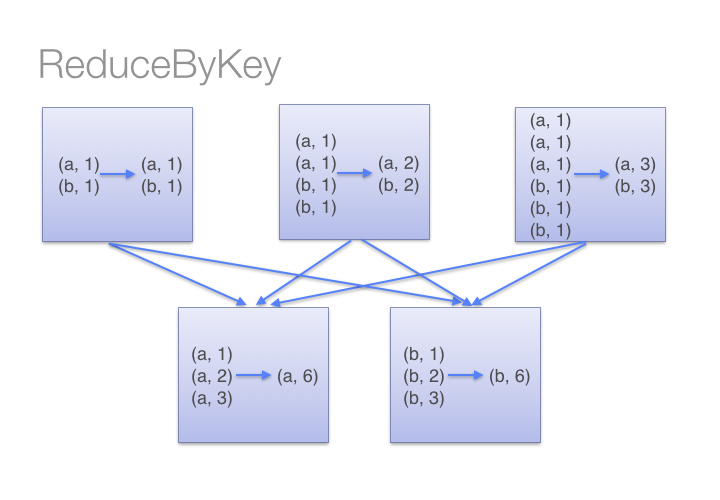


* *groupByKey()* puede causar problemas de memoria puesto que TODOS LOS DATOS se mezclan (*shuffle*) primero, es decir, Spark decide a qué máquina enviar cada par *(clave,valor)*, provocando un flujo innecesariamente mayor de datos a través de toda la red:

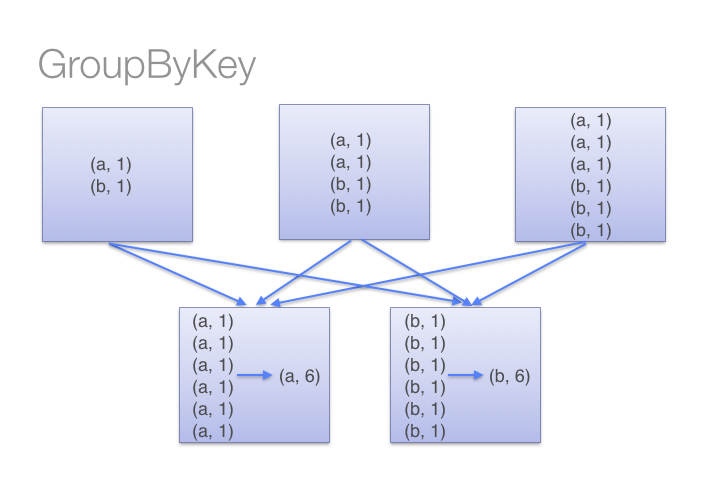

In [ ]:
#Solución 10 (Calcular el promedio de dinero gastado entre los *user_id* que han comprado
            #agregar una nueva columna con dichos promedios para cada respectivo *user_id*):

In [ ]:
#Preprocesamiento para aplicar operaciones al RDD:
#A DIFERENCIA DEL EJERCICIO ANTERIOR:

#Primero tenemos que combinar para cada *user_id* los precios pagados, es decir, 
#hacer una suma de lo gastado dividido entre las veces que han comprado.
#Es decir, queremos (user_id, (gastado, veces_compra)) 

def user_id_gastado(col):
  if (col["event_type" == 'purchase']):
    return [(col["user_id"], col["price"])]
  return []


In [ ]:
#Retomamos el rdd_df_eCommerce_2019Dec_pruebas_limpio = df_eCommerce_2019Dec_pruebas_limpio.rdd
#anterior:

In [ ]:
#Solución 11 (Calcular el promedio de dinero gastado entre los *user_id* que han comprado
             # EN CADA DETERMINADO PRODUCTO y agregar una nueva columna con dichos
             # promedios para cada respectivo *user_id* y producto *brand*):


# Variables *broadcast* (difusión) y *acumuladores*:

Cuando pasamos una operación de Spark (como mapear *map()* y reducir *reduce()*) esta se envía a los nodos del clúster y se ejecutan como **copias separadas de todas las variables involucradas en la función**. Es decir, si estas variables sufren alguna actualización en alguno(s) nodo(s) de los clúster, esta no se propaga a los demás nodos del clúster ni se informa al *Spark Driver* de dicha actualización.
Un ejemplo sería si en nuestro código utilizamos *variables globales*, esto no funcionaría en Spark dado que los cambios producidos (o actualizaciones) no se darían a conocer a los demás nodos.

Por lo tanto, la idea es transmitir esas actualizaciones comunes necesarias a los demás nodos del clúster en cada etapa, de tal manera que estos costes de comunicación a los demás nodos del clúster sean lo más eficientes posibles.

    OUTPUT:

    broadcastVar = sc.broadcast([1, 2, 3]) #Metemos en el *SparkContext()* una variable broadcast para luego poder utilizar dicha 
                                            variable en cualquiera de los ejecutores de Spark.
    <pyspark.broadcast.Broadcast object at 0x102789f10>

    broadcastVar.value
    [1, 2, 3]


In [10]:
broadcastVar = sc.broadcast([1, 2, 3])
broadcastVar.value

[1, 2, 3]



**Acumuladores**: Estos son mucho más interesantes, podemos utilizarlo mayoritariamente para hacer contadores

Por defecto son de tipo entero *int* y de tipo *long*, aunque puedes crearte tus propios acumuladores utilizando *AccumulatorParam*.


Las actualizaciones compartidas (del acumulador) que se vayan realizando podrán ser llevadas a cabo **sólo con acciones**. OJO porque si se aplican transformaciones al RDD estas deben ser aplicadas de antemano y, después aplicar el acumulador a ese nuevo RDD pues si no es así simplemente los acumuladores se aplicarán al RDD original. Veámoslo con un ejemplo:


    accum = sc.accumulator(0) #Iniciar acumulador a 0 en el *SparkContext()*
    def g(x):
        accum.add(x)
        return f(x)
    data.map(g)
    # Aquí, accum sigue siendo 0 porque ninguna acción se ha aplicado para que aplique *map()* (que es una **transformación** del RDD). 
    Debería aplicarse primero la transformación y, finalmente, aplicar el acumulador al RDD transformado



In [12]:
accum = sc.accumulator(0)
sumatorioError = 0

def func(x):
  global sumatorioError

  accum.add(x) #Utilizar el acumulador para sumarle el número
  #OTRA FORMA: accum = accum + x
  sumatorioError = sumatorioError + x #O bien utilizar *sumatorioError* para sumar "x"

rdd = sc.parallelize([1,2,3,4,5])
rdd.foreach(func) #Aplico a cada elemento la función *func*

print("El valor de 'accum' es: ",accum)
print("El valor de 'sumatorioError' es: ", sumatorioError)

El valor de 'accum' es:  15
El valor de 'sumatorioError' es:  0


Como vemos, el valor del acumulador se "transmiten" a los nodos de los clústers y nos devuelve el resultado correcto. En cambio, la variable global *sumatorioError* no funciona bien porque las actualizaciones no son compartidas entre los nodos del clúster. No se ejecuta la variable global *sumatorioError* en cada una de las diferentes máquinas.

In [14]:
#Solución a 7:

"""
OBJETIVO: Que en lugar de mostrar el "product_id", muestre los nombres de las 
marcas "brand".

UTILIZAREMOS EL DATASET DE PRUEBAS.

NOTA: El "product_id" no es único para cada marca "brand", por lo que cada 
"product_id" se mostrarán varias veces la misma marca "brand". Es por eso que
sería más conveniente utilizar el par (marca, numero_ventas), pues sería lo más
intuitivo, pero queremos trabajar con variables broadcast y acumuladores
"""

df_eCommerce_2019Dec_pruebas.select(["brand"]).distinct().count() #Hay 13 marcas distintas (incluida la marca blanca: None)



13

In [75]:
#Convertimos el *DataFrame* en un RDD pues luego queremos aplicar un flatMap() sobre este:

rdd_eCommerce_2019Dec_pruebas = df_eCommerce_2019Dec_pruebas.rdd

In [28]:
#Seleccionamos aquellos "product_id" comprados:

def productos_id_comprados(col):
  if (col["event_type"] == "purchase"):
    return [(col["product_id"], 1)]
  return []

df_eCommerce_2019Dec_pruebas_pares_id_comprados = rdd_eCommerce_2019Dec_pruebas.flatMap(productos_id_comprados)
df_eCommerce_2019Dec_pruebas_pares_id_comprados.take(6) #Todos los "product_id" son distintos

[(4600, 1), (4607, 1), (4640, 1), (4689, 1), (4768, 1), (4820, 1)]

In [89]:
"""
Queremos identificar cada ID con su producto. Por ejemplo, en lugar de (4600, 1)
queremos ('runail', x), donde x es un valor que se irá actualizando porque son 
se ha comprado varias veces la marca 'runail'
"""

def preproc_ID_marcas(line):
  campos = line.split(',')
  marcas = int(campos[4]) #Acceder al campo de marcas de 2019-Dec-pruebas.csv
  #marcas_lista = []

  #marcas_lista.append(marcas)

  return (marcas,1)

#QUIERO HACER ESTO CON marcas=[] Y LUEGO CON DICCIONARIOS marcas={ID:marca}

In [93]:
prueba_marcas = rdd_eCommerce_2019Dec_pruebas.map(preproc_ID_marcas)
prueba_marcas

PythonRDD[75] at RDD at PythonRDD.scala:53

In [ ]:
for i in prueba_marcas.take(10): print (i)

In [52]:

def preprocesamientoDeDatos(line): #OJO: Ponemos "line" porque luego le vamos a pasar el archivo en 
                                   #la línea: rdd = lines.map(preprocesamientoDeDatos)
    campos = line.split() #Los camos están separados por un espacio ' '
    edad = int(campos[1]) #Tercera columna y son números enteros.
    numeroAmigos = int(campos[2]) #Cuarta columna y son números enteros.
    
    return (edad, numeroAmigos) #Devolver el par (clave, valor) 

lines = sc.textFile("texto_pruebas_1.txt")
rdd = lines.map(preprocesamientoDeDatos)

**Is PySpark faster than pandas?**

Due to parallel execution on all cores on multiple machines, PySpark runs operations faster then pandas.
In other words, pandas DataFrames run operations on a single node whereas PySpark runs on multiple machines. 
To know more read at pandas DataFrame vs PySpark Differences with Examples.

https://sparkbyexamples.com/pyspark/pandas-vs-pyspark-dataframe-with-examples/


Main differences between *DataFrame* and *Pandas*:

https://www.geeksforgeeks.org/difference-between-spark-dataframe-and-pandas-dataframe/

# CONTEO DEL NÚMERO DE OCURRENCIAS:

In [ ]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local[*]").setAppName("conteo_ocurrencias")
sc = SparkContext(conf = conf) 
sc

<SparkContext master=local[*] appName=conteo_ocurrencias>

Podemos contar el número de ocurrencias en un dataset de varias formas. 

1ª FORMA: Uso de *flatMap()* (ver subsección: "NOTA: *map()* vs *flatMap()*")







In [ ]:
lines = sc.textFile("libro.txt")
palabras = lines.flatMap(lambda x : x.split()) #Obtenemos cada palabra del documento, están separadas por espacios
palabras.take(12)

['How',
 'to',
 'Invest',
 'in',
 'Real',
 'Estate',
 'with',
 'No',
 'Money',
 'Investing',
 'in',
 'Real']

In [ ]:
print(palabras.collect())

['How', 'to', 'Invest', 'in', 'Real', 'Estate', 'with', 'No', 'Money', 'Investing', 'in', 'Real', 'Estate', 'Eric', 'Alexander', 'Pattini', 'Real', 'Estate', 'Step-By-', 'Step', 'Guide', 'Table', 'of', 'Contents', 'Introduction', '3', 'Chapter', '1:', 'Business', 'Introduction', '4', 'Real', 'Estate', 'Sources', 'of', 'Income', '4', 'Setting', 'Goals', '5', 'Chapter', '2:', 'Setting', 'a', 'Strong', 'Foundation', '6', 'Asset', 'and', 'Tax', 'Preparation', '6', 'Building', 'Your', 'Team', '9', 'Chapter', '3:', 'How', 'to', 'Determine', 'the', 'Value', 'of', 'an', 'Investment', '11', 'How', 'to', 'Know', 'When', 'to', 'Buy', 'a', 'Property', '11', 'Chapter', '4:', 'How', 'to', 'Find', 'Valuable', 'Real', 'Estate', 'Deals', '16', 'Tried', 'and', 'True', 'Marketing', 'Techniques', 'to', 'Take', 'your', 'Business', 'to', 'the', 'Next', 'Level', '16', 'Marketing', 'for', 'Wholesale', 'Opportunities', '18', 'Finding', 'Motivated', 'Sellers', '19', 'Chapter', '5:', 'How', 'to', 'Structure', 'a

In [ ]:
conteo_1 = palabras.countByValue()
conteo_1    #len(conteo_1) = 1985

Salida del código anterior, dada su longitud solo exponemos una parte del output:

    defaultdict(int,
                {'How': 26,
                'to': 270,
                'Invest': 1,
                'in': 87,
                'Real': 25,
                'Estate': 22,
                'with': 27,
                'No': 2, ...)}

In [ ]:
#¡OJO!: Por esto aplicamos *flatMap()* en lugar de *map()*:

"""
*map()* te devuelve cada línea en forma de un array, devolviendo un array por cada 
línea de texto.
En cambio, *flatMap()* te devuelve cada objeto separado por un espacio (en este caso,
cada palabra) en un ÚNICO array.
"""

words = lines.map(lambda x : x.split())
words.take(6)

[[],
 ['How', 'to', 'Invest', 'in', 'Real', 'Estate', 'with', 'No', 'Money'],
 [],
 ['Investing', 'in', 'Real', 'Estate'],
 [],
 []]

Ahora queremos ordenar las palabras de mayor a menor ocurrencia. El problema es que *countByValue()* da una salida tipo diccionario, es decir, si ejecutamos el código de conteo de palabras por valor, obtendríamos algo de este estilo:

    defaultdict(int,
                {'How': 26,
                'to': 270,
                'Invest': 1,
                'in': 87,
                'Real': 25,
                'Estate': 22,
                'with': 27,
                'No': 2, ...)}


Para ello, podemos crear entonces el par (clave, valor) con un *map()* para después utilizar *reduceByKey()* para el conteo de ocurrencias:

In [ ]:
palabras_tuplas = palabras.map(lambda x : (x,1))
palabras_tuplas

PythonRDD[16] at RDD at PythonRDD.scala:53

In [ ]:
palabras_tuplas.take(9)

[('How', 1),
 ('to', 1),
 ('Invest', 1),
 ('in', 1),
 ('Real', 1),
 ('Estate', 1),
 ('with', 1),
 ('No', 1),
 ('Money', 1)]

In [ ]:
palabras_tuplas_conteo = palabras_tuplas.reduceByKey(lambda x,y : x+y)
palabras_tuplas_conteo


PythonRDD[37] at RDD at PythonRDD.scala:53

In [ ]:
palabras_tuplas_conteo.take(9)

[('in', 87),
 ('Estate', 22),
 ('Investing', 2),
 ('Alexander', 2),
 ('Step-By-', 1),
 ('of', 123),
 ('Contents', 1),
 ('Chapter', 12),
 ('1:', 2)]

In [ ]:
#La palabra más usada en el archivo "libro.txt":

palabras_tuplas_conteo.max(lambda x : x[1])

('to', 270)

In [ ]:
#Ordenamos el RDD:

palabras_tuplas_conteo_ordenado = palabras_tuplas_conteo.sortBy(lambda x: x[1])
palabras_tuplas_conteo_ordenado


PythonRDD[30] at RDD at PythonRDD.scala:53

In [ ]:
palabras_tuplas_conteo_ordenado.take(9)

[('Step-By-', 1),
 ('Contents', 1),
 ('9', 1),
 ('19', 1),
 ('22', 1),
 ('Welcome', 1),
 ('believe', 1),
 ('burning', 1),
 ('independent,', 1)]

## ORDENAR EN UN RDD:

Otros comandos para **ORDENAR UN RDD**:



*   *sortByKey()*: Aquí ordenamos *por claves*. En el ejemplo anterior las claves eran strings, y lo que nos interesaba eran los números. Si hubiésemos querido aplicar esto, deberíamos haber pasado el par (clave, valor) a (valor, clave) haciendo un *map(lambda (x, y) : (y, x))* sobre el RDD y luego aplicar *sortByKey()*.

*   *sortBy()*: Aquí ordenamos según la columna que seleccionemos, de esta forma no hace falta invertir el par (clave, valor), que puede ser muy costoso. En el ejemplo anterior especificamos que queríamos ordenarlo tomando como referencia la columna 1 (la de los  números vaya).

Ejemplos:

    tmp = [('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]

    
    sc.parallelize(tmp).sortBy(lambda x: x[0]).collect()
    OUT: [('1', 3), ('2', 5), ('a', 1), ('b', 2), ('d', 4)]

    sc.parallelize(tmp).sortBy(lambda x: x[1]).collect()
    OUT: [('a', 1), ('b', 2), ('1', 3), ('d', 4), ('2', 5)]




##  NOTA: *map()* vs *flatMap()*:

La diferencia entre *map()* y *flatMap()* es enorme en Spark. 

*   *map()*: Es una transformación que se aplica a cada elemento de un RDD, DataFrame o dataset y devuelve el nuevo RDD, DataFrame o dataset transformado, es decir, devuelve un único output. En otras palabras, la correspondencia se aplica **1 a 1**, por lo que si tenemos n RDDs, se devolverán exactamente n RDDs.  

*   *flatMap()*: Igual que el anterior *map()*, pero con la diferencia de que puede devolver VARIOS outputs.

Para entender visualmente lo anterior, se ilustran dos animaciones gif acerca de estos dos comandos:

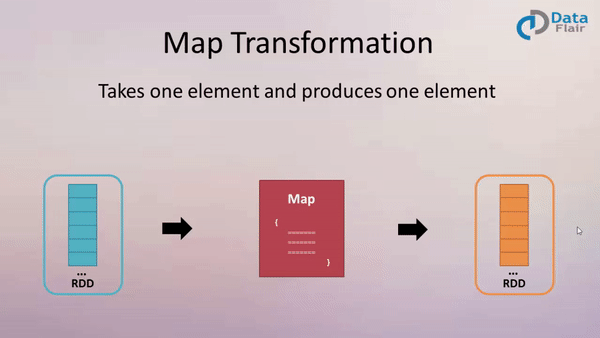





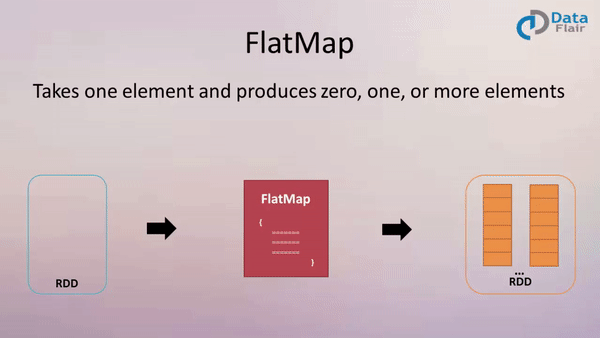



In [ ]:
#Ejemplo 1: Devolver todo el resultado en una lista, en lugar de en una lista de duplas:

lista = [2,3,4,5]
lista_rdd = sc.parallelize(lista) #Creamos el RDD

lista_rdd_map = lista_rdd.map(lambda x : x**2)
print(lista_rdd_map.collect())


[4, 9, 16, 25]


In [ ]:
#Ahora vamos a agrupar esto en la lista pero en forma de duplas del tipo: (número original de la lista *lista*, su cuadrado)

lista_rdd_map_tupla = lista_rdd.map(lambda x : (x, x**2))
print(lista_rdd_map_tupla.collect())


[(2, 4), (3, 9), (4, 16), (5, 25)]


In [ ]:
#Como hemos visto, *map()* los agrupa en una lista de tuplas, veamos lo que ocurre con 
#*flatMap()*:

lista_rdd_map_aplanado = lista_rdd.flatMap(lambda x : (x, x**2))
print(lista_rdd_map_aplanado.collect())


[2, 4, 3, 9, 4, 16, 5, 25]


El proceso de "aplanamiento" de *flatMap()* es el siguiente:

["aa bb cc", "", "dd"] => [["aa","bb","cc"],[],["dd"]] => ["aa","bb","cc","dd"]


# TIPOS DE RDDs:


*   *PairRDDFunctions* or *PairRDD* – Pair RDD is a key-value pair. This is mostly used RDD type.
*   *ParallelCollectionRDD*
*   *ShuffledRDD*
*   *SequenceFileRDD*
*   *DoubleRDD*
*   *HadoopRDD*


Más información en: https://sparkbyexamples.com/spark-rdd-tutorial/ 
en la parte de "Types of RDD".
